In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Anantapur']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
0,0,14.08,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,6.19,0.07,0.18,...,41.0,587.0,101.0,5.16,0.30,0.17,8.89,0.51,15.24,G.Nut
1,1,14.09,77.69,Anantapur,Penukonda,Gonipeta,Redsoil,8.40,0.33,0.31,...,102.0,811.0,261.0,9.91,0.36,0.57,3.24,0.44,6.90,G.Nut
2,2,14.09,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,7.10,0.11,0.17,...,46.0,582.0,48.0,3.77,0.37,0.19,5.54,0.42,8.34,G.Nut
3,3,14.10,77.70,Anantapur,Penukonda,Gonipeta,Sandi soil,8.30,0.21,0.20,...,35.0,3048.0,52.0,4.14,0.23,0.21,1.79,0.67,4.17,Horsegram
4,4,14.09,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,6.40,0.06,0.22,...,76.0,511.0,84.0,1.45,0.36,0.22,22.26,0.45,9.20,Horsegram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,7.651929,0.192857,0.289500,6.512429,80.771429,1725.871429,206.078571,9.862571,0.404643,0.469214,5.762143,0.661286,8.165786
std,0.998730,0.236054,0.185656,11.774011,41.004183,992.319243,191.302768,20.594145,0.407398,0.346146,4.518472,0.323007,5.464037
min,5.200000,0.030000,0.060000,1.180000,23.000000,166.000000,19.000000,1.060000,0.100000,0.150000,0.790000,0.200000,1.630000
25%,6.837500,0.080000,0.177500,2.140000,53.750000,823.750000,85.500000,2.800000,0.210000,0.250000,2.540000,0.457500,4.025000
50%,8.150000,0.130000,0.230000,3.615000,68.500000,1511.000000,146.000000,3.930000,0.300000,0.330000,4.290000,0.560000,7.020000
75%,8.385000,0.200000,0.360000,7.595000,97.500000,2651.000000,254.500000,6.360000,0.460000,0.547500,7.892500,0.780000,10.340000
max,9.020000,1.610000,1.410000,132.060000,265.000000,4097.000000,1179.000000,181.160000,3.390000,2.380000,27.920000,1.920000,29.670000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Mixed soil', 'Redsoil', 'Sandi soil', 'Red soil', 'Black Soil',
       'Sandy soil', 'RED', 'BLACK'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Redsoil', 'RED', 'Red soil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace('BLACK', 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Sandi soil', 'Sandy soil'], 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Mixed soil', 'Mixed Soil')
df.SoilType.unique()

array(['Mixed Soil', 'Red Soil', 'Sandy Soil', 'Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 112, 'Mixed Soil': 12, 'Black Soil': 10, 'Sandy Soil': 6}

<BarContainer object of 4 artists>

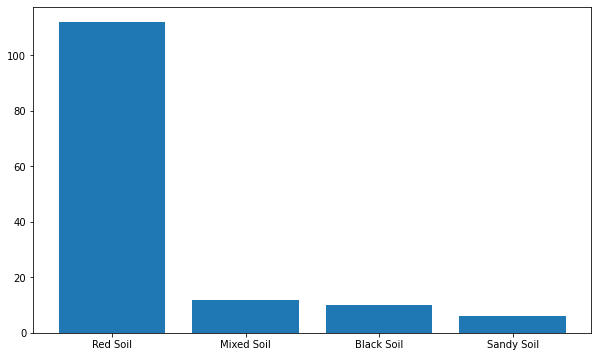

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['G.Nut', 'Horsegram', 'jowar', 'cotton', 'GROUND NUT', 'SUNFLOWER',
       'PADDY', 'TAMATO'], dtype=object)

In [14]:
df['Crop'].value_counts()

G.Nut         102
Horsegram      16
GROUND NUT     14
TAMATO          3
PADDY           2
jowar           1
SUNFLOWER       1
cotton          1
Name: Crop, dtype: int64

GroundNut    116
HorseGram     16
Tomato         3
Paddy          2
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

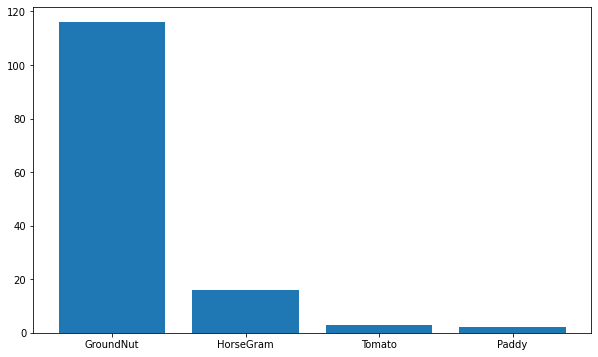

In [15]:
df['Crop'] = df['Crop'].replace(['G.Nut', 'GROUND NUT'], 'GroundNut')
df['Crop'] = df['Crop'].replace(['Horsegram'], 'HorseGram')
df['Crop'] = df['Crop'].replace(['TAMATO'], 'Tomato')
df['Crop'] = df['Crop'].replace(['PADDY'], 'Paddy')
df = df[(df['Crop'] != 'jowar') & (df['Crop'] != 'cotton') & (df['Crop'] != 'SUNFLOWER')]
print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
df = df[(df["Crop"] != 'Tomato') & (df["Crop"] != 'Paddy')]

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.324521,0.246057,0.096174,0.270055,0.738869,0.333925,0.181708,0.128388,0.445603,-0.384213,0.163669,-0.604875
EC,0.324521,1.000000,0.353826,0.536092,0.327708,0.382661,0.686467,0.917043,0.265468,0.445855,0.133792,0.346147,-0.144486
OC,0.246057,0.353826,1.000000,0.294536,0.533999,0.275270,0.583832,0.309083,0.380516,0.627248,0.203830,0.454423,-0.048781
P,0.096174,0.536092,0.294536,1.000000,0.468772,0.110360,0.480357,0.704298,0.265371,0.299007,0.309679,0.349615,-0.016899
K,0.270055,0.327708,0.533999,0.468772,1.000000,0.210341,0.500043,0.342663,0.225943,0.534825,0.183104,0.420192,-0.122099
Ca,0.738869,0.382661,0.275270,0.110360,0.210341,1.000000,0.405896,0.254760,0.009658,0.352852,-0.186718,0.375051,-0.453159
Mg,0.333925,0.686467,0.583832,0.480357,0.500043,0.405896,1.000000,0.700722,0.209486,0.625129,0.259137,0.563011,-0.199968
S,0.181708,0.917043,0.309083,0.704298,0.342663,0.254760,0.700722,1.000000,0.177975,0.405801,0.276201,0.361188,-0.057399
Zn,0.128388,0.265468,0.380516,0.265371,0.225943,0.009658,0.209486,0.177975,1.000000,0.379540,0.045797,0.051484,0.034093
B,0.445603,0.445855,0.627248,0.299007,0.534825,0.352852,0.625129,0.405801,0.379540,1.000000,0.058007,0.405252,-0.284042


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['P', 'K', 'Ca', 'Mg', 'S', 'B', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'Zn', 'Fe', 'Mn', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
X = X.values
y = y.values
print(type(X[0]))

     pH    EC    OC   Zn    Fe     Mn  Black Soil  Mixed Soil  Red Soil  \
0  6.19  0.07  0.18  0.3  8.89  15.24           0           1         0   

   Sandy Soil  
0           0  
<class 'numpy.ndarray'>


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
print(X[0])
X[:,0:6] = sc1.fit_transform(X[:,0:6])
print(X[0])

[ 6.19  0.07  0.18  0.3   8.89 15.24  0.    1.    0.    0.  ]
[-1.4324609  -0.52831773 -0.58362014 -0.27682486  0.6931062   1.3388061
  0.          1.          0.          0.        ]


In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8787878787878788


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 3.96 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8181818181818182


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.00 %
Standard Deviation: 9.17 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8484848484848485


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 3.96 %


In [36]:
pickle.dump(clf3, open('Anantapur_model.pkl', 'wb'))
pickle.dump(sc1, open('Anantapur_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  0.9797979797979798
Testing Accuracy:  0.9090909090909091


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.89 %
Standard Deviation: 10.20 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8888888888888888
Testing Accuracy:  0.8787878787878788


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 3.96 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.3941174	total: 156ms	remaining: 15.4s
1:	learn: 0.3262724	total: 157ms	remaining: 7.71s
2:	learn: 0.3071175	total: 159ms	remaining: 5.14s
3:	learn: 0.3008756	total: 160ms	remaining: 3.85s
4:	learn: 0.2884453	total: 162ms	remaining: 3.08s
5:	learn: 0.2721894	total: 164ms	remaining: 2.56s
6:	learn: 0.2658354	total: 165ms	remaining: 2.2s
7:	learn: 0.2512746	total: 167ms	remaining: 1.92s
8:	learn: 0.2468924	total: 168ms	remaining: 1.7s
9:	learn: 0.2287090	total: 170ms	remaining: 1.53s
10:	learn: 0.2222965	total: 171ms	remaining: 1.39s
11:	learn: 0.1983719	total: 173ms	remaining: 1.27s
12:	learn: 0.1891407	total: 174ms	remaining: 1.17s
13:	learn: 0.1601984	total: 176ms	remaining: 1.08s
14:	learn: 0.1576179	total: 177ms	remaining: 1s
15:	learn: 0.1546087	total: 179ms	remaining: 938ms
16:	learn: 0.1518242	total: 180ms	remaining: 880ms
17:	learn: 0.1489510	total: 182ms	remaining: 828ms
18:	learn: 0.1427186	total: 183ms	remaining: 781ms
19:	learn: 0.1366541	total: 185ms	remaining: 7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.4409467651
bestIteration = 72

Training on fold [1/5]

bestTest = 0.4296605483
bestIteration = 78

Training on fold [2/5]

bestTest = 0.3549648174
bestIteration = 95

Training on fold [3/5]

bestTest = 0.3473135748
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3628166218
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6772888	test: 0.6840308	best: 0.6840308 (0)	total: 580us	remaining: 580ms
1:	learn: 0.6649946	test: 0.6746270	best: 0.6746270 (1)	total: 1.45ms	remaining: 721ms
2:	learn: 0.6552267	test: 0.6683683	best: 0.6683683 (2)	total: 2.04ms	remaining: 678ms
3:	learn: 0.6406126	test: 0.6574081	best: 0.6574081 (3)	total: 2.55ms	remaining: 634ms
4:	learn: 0.6268525	test: 0.6488845	best: 0.6488845 (4)	total: 3.06ms	remaining: 609ms
5:	learn: 0.6146351	test: 0.6423442	best: 0.6423442 (5)	total: 3.6ms	remaining: 596ms
6:	learn: 0.6046483	test: 0.6356865	best: 0.6356865 (6)	total: 4.12ms	remaining: 584ms
7:	learn: 0.5929252	test: 0.6270984	best: 0.6270984 (7)	total: 4.54ms	remaining: 563ms
8:	learn: 0.5824355	test: 0.6204899	best: 0.6204899 (8)	total: 5.09ms	remaining: 560ms
9:	learn: 0.5734126	test: 0.6154496	best: 0.6154496 (9)	total: 5.7ms	remaining: 564ms
10:	learn: 0.5640086	test: 0.6083747	best: 0.6083747 (10)	total: 6.32ms	remaining: 569ms
11:	learn: 0.5554604	test: 0.6021752	best: 0

286:	learn: 0.1427086	test: 0.5059829	best: 0.4686780 (132)	total: 160ms	remaining: 397ms
287:	learn: 0.1421464	test: 0.5068304	best: 0.4686780 (132)	total: 160ms	remaining: 397ms
288:	learn: 0.1419632	test: 0.5069125	best: 0.4686780 (132)	total: 161ms	remaining: 396ms
289:	learn: 0.1413635	test: 0.5069367	best: 0.4686780 (132)	total: 162ms	remaining: 396ms
290:	learn: 0.1406677	test: 0.5072155	best: 0.4686780 (132)	total: 162ms	remaining: 395ms
291:	learn: 0.1397881	test: 0.5078127	best: 0.4686780 (132)	total: 163ms	remaining: 395ms
292:	learn: 0.1395337	test: 0.5077226	best: 0.4686780 (132)	total: 163ms	remaining: 394ms
293:	learn: 0.1389642	test: 0.5075688	best: 0.4686780 (132)	total: 164ms	remaining: 393ms
294:	learn: 0.1385663	test: 0.5083500	best: 0.4686780 (132)	total: 164ms	remaining: 393ms
295:	learn: 0.1380709	test: 0.5073060	best: 0.4686780 (132)	total: 165ms	remaining: 392ms
296:	learn: 0.1377945	test: 0.5071259	best: 0.4686780 (132)	total: 165ms	remaining: 392ms
297:	learn

580:	learn: 0.0623917	test: 0.5345369	best: 0.4686780 (132)	total: 318ms	remaining: 230ms
581:	learn: 0.0621908	test: 0.5348969	best: 0.4686780 (132)	total: 319ms	remaining: 229ms
582:	learn: 0.0620916	test: 0.5349674	best: 0.4686780 (132)	total: 320ms	remaining: 229ms
583:	learn: 0.0619152	test: 0.5357516	best: 0.4686780 (132)	total: 320ms	remaining: 228ms
584:	learn: 0.0618195	test: 0.5364937	best: 0.4686780 (132)	total: 321ms	remaining: 228ms
585:	learn: 0.0614871	test: 0.5370964	best: 0.4686780 (132)	total: 321ms	remaining: 227ms
586:	learn: 0.0613235	test: 0.5373837	best: 0.4686780 (132)	total: 322ms	remaining: 226ms
587:	learn: 0.0612379	test: 0.5377401	best: 0.4686780 (132)	total: 322ms	remaining: 226ms
588:	learn: 0.0610470	test: 0.5372392	best: 0.4686780 (132)	total: 323ms	remaining: 225ms
589:	learn: 0.0608523	test: 0.5374639	best: 0.4686780 (132)	total: 324ms	remaining: 225ms
590:	learn: 0.0607395	test: 0.5376603	best: 0.4686780 (132)	total: 324ms	remaining: 224ms
591:	learn

874:	learn: 0.0350798	test: 0.5796361	best: 0.4686780 (132)	total: 486ms	remaining: 69.4ms
875:	learn: 0.0350448	test: 0.5800312	best: 0.4686780 (132)	total: 487ms	remaining: 68.9ms
876:	learn: 0.0350058	test: 0.5804073	best: 0.4686780 (132)	total: 487ms	remaining: 68.3ms
877:	learn: 0.0349745	test: 0.5808577	best: 0.4686780 (132)	total: 488ms	remaining: 67.8ms
878:	learn: 0.0349216	test: 0.5809394	best: 0.4686780 (132)	total: 488ms	remaining: 67.2ms
879:	learn: 0.0348904	test: 0.5811472	best: 0.4686780 (132)	total: 489ms	remaining: 66.6ms
880:	learn: 0.0348236	test: 0.5812922	best: 0.4686780 (132)	total: 489ms	remaining: 66.1ms
881:	learn: 0.0347143	test: 0.5820004	best: 0.4686780 (132)	total: 490ms	remaining: 65.5ms
882:	learn: 0.0346532	test: 0.5820771	best: 0.4686780 (132)	total: 490ms	remaining: 65ms
883:	learn: 0.0346181	test: 0.5821557	best: 0.4686780 (132)	total: 491ms	remaining: 64.4ms
884:	learn: 0.0345581	test: 0.5825039	best: 0.4686780 (132)	total: 491ms	remaining: 63.8ms
8

143:	learn: 0.0777524	test: 0.5859344	best: 0.4918857 (19)	total: 81.6ms	remaining: 485ms
144:	learn: 0.0768474	test: 0.5872399	best: 0.4918857 (19)	total: 82.3ms	remaining: 485ms
145:	learn: 0.0757777	test: 0.5869231	best: 0.4918857 (19)	total: 82.9ms	remaining: 485ms
146:	learn: 0.0751008	test: 0.5853358	best: 0.4918857 (19)	total: 83.5ms	remaining: 485ms
147:	learn: 0.0742384	test: 0.5863603	best: 0.4918857 (19)	total: 84.1ms	remaining: 484ms
148:	learn: 0.0735252	test: 0.5870651	best: 0.4918857 (19)	total: 84.6ms	remaining: 483ms
149:	learn: 0.0734043	test: 0.5878658	best: 0.4918857 (19)	total: 85.2ms	remaining: 483ms
150:	learn: 0.0729702	test: 0.5886556	best: 0.4918857 (19)	total: 85.7ms	remaining: 482ms
151:	learn: 0.0720857	test: 0.5902179	best: 0.4918857 (19)	total: 86.3ms	remaining: 481ms
152:	learn: 0.0717102	test: 0.5910539	best: 0.4918857 (19)	total: 86.8ms	remaining: 481ms
153:	learn: 0.0709669	test: 0.5920773	best: 0.4918857 (19)	total: 87.4ms	remaining: 480ms
154:	learn

435:	learn: 0.0184176	test: 0.7053400	best: 0.4918857 (19)	total: 250ms	remaining: 323ms
436:	learn: 0.0183804	test: 0.7055552	best: 0.4918857 (19)	total: 251ms	remaining: 323ms
437:	learn: 0.0183285	test: 0.7056465	best: 0.4918857 (19)	total: 251ms	remaining: 322ms
438:	learn: 0.0182984	test: 0.7057650	best: 0.4918857 (19)	total: 252ms	remaining: 322ms
439:	learn: 0.0182723	test: 0.7059223	best: 0.4918857 (19)	total: 253ms	remaining: 321ms
440:	learn: 0.0182256	test: 0.7062598	best: 0.4918857 (19)	total: 253ms	remaining: 321ms
441:	learn: 0.0181787	test: 0.7066377	best: 0.4918857 (19)	total: 254ms	remaining: 320ms
442:	learn: 0.0181568	test: 0.7070811	best: 0.4918857 (19)	total: 255ms	remaining: 320ms
443:	learn: 0.0180502	test: 0.7071426	best: 0.4918857 (19)	total: 255ms	remaining: 320ms
444:	learn: 0.0179457	test: 0.7068358	best: 0.4918857 (19)	total: 256ms	remaining: 319ms
445:	learn: 0.0179033	test: 0.7067773	best: 0.4918857 (19)	total: 257ms	remaining: 319ms
446:	learn: 0.0178828

706:	learn: 0.0100914	test: 0.7646448	best: 0.4918857 (19)	total: 412ms	remaining: 171ms
707:	learn: 0.0100734	test: 0.7652615	best: 0.4918857 (19)	total: 413ms	remaining: 170ms
708:	learn: 0.0100668	test: 0.7656868	best: 0.4918857 (19)	total: 413ms	remaining: 170ms
709:	learn: 0.0100606	test: 0.7658802	best: 0.4918857 (19)	total: 414ms	remaining: 169ms
710:	learn: 0.0100554	test: 0.7657604	best: 0.4918857 (19)	total: 415ms	remaining: 169ms
711:	learn: 0.0100277	test: 0.7658609	best: 0.4918857 (19)	total: 416ms	remaining: 168ms
712:	learn: 0.0100198	test: 0.7656894	best: 0.4918857 (19)	total: 416ms	remaining: 168ms
713:	learn: 0.0099976	test: 0.7654879	best: 0.4918857 (19)	total: 417ms	remaining: 167ms
714:	learn: 0.0099887	test: 0.7657859	best: 0.4918857 (19)	total: 417ms	remaining: 166ms
715:	learn: 0.0099801	test: 0.7661013	best: 0.4918857 (19)	total: 418ms	remaining: 166ms
716:	learn: 0.0099624	test: 0.7661700	best: 0.4918857 (19)	total: 418ms	remaining: 165ms
717:	learn: 0.0099479

988:	learn: 0.0068429	test: 0.8109706	best: 0.4918857 (19)	total: 573ms	remaining: 6.38ms
989:	learn: 0.0068335	test: 0.8109048	best: 0.4918857 (19)	total: 574ms	remaining: 5.8ms
990:	learn: 0.0068280	test: 0.8107221	best: 0.4918857 (19)	total: 575ms	remaining: 5.22ms
991:	learn: 0.0068226	test: 0.8111316	best: 0.4918857 (19)	total: 576ms	remaining: 4.64ms
992:	learn: 0.0068154	test: 0.8110203	best: 0.4918857 (19)	total: 576ms	remaining: 4.06ms
993:	learn: 0.0068102	test: 0.8109412	best: 0.4918857 (19)	total: 577ms	remaining: 3.48ms
994:	learn: 0.0068035	test: 0.8108583	best: 0.4918857 (19)	total: 577ms	remaining: 2.9ms
995:	learn: 0.0067960	test: 0.8104181	best: 0.4918857 (19)	total: 578ms	remaining: 2.32ms
996:	learn: 0.0067838	test: 0.8105868	best: 0.4918857 (19)	total: 579ms	remaining: 1.74ms
997:	learn: 0.0067786	test: 0.8104241	best: 0.4918857 (19)	total: 579ms	remaining: 1.16ms
998:	learn: 0.0067732	test: 0.8108367	best: 0.4918857 (19)	total: 580ms	remaining: 580us
999:	learn: 0

148:	learn: 0.2084312	test: 0.5006271	best: 0.4861783 (110)	total: 162ms	remaining: 924ms
149:	learn: 0.2074104	test: 0.5021721	best: 0.4861783 (110)	total: 163ms	remaining: 924ms
150:	learn: 0.2068889	test: 0.5020593	best: 0.4861783 (110)	total: 164ms	remaining: 923ms
151:	learn: 0.2062327	test: 0.5031619	best: 0.4861783 (110)	total: 165ms	remaining: 919ms
152:	learn: 0.2049753	test: 0.5042737	best: 0.4861783 (110)	total: 166ms	remaining: 918ms
153:	learn: 0.2040848	test: 0.5050552	best: 0.4861783 (110)	total: 167ms	remaining: 917ms
154:	learn: 0.2030468	test: 0.5063297	best: 0.4861783 (110)	total: 168ms	remaining: 916ms
155:	learn: 0.2012873	test: 0.5056931	best: 0.4861783 (110)	total: 169ms	remaining: 914ms
156:	learn: 0.2002460	test: 0.5055672	best: 0.4861783 (110)	total: 170ms	remaining: 913ms
157:	learn: 0.1993959	test: 0.5045755	best: 0.4861783 (110)	total: 171ms	remaining: 912ms
158:	learn: 0.1987874	test: 0.5039987	best: 0.4861783 (110)	total: 173ms	remaining: 915ms
159:	learn

292:	learn: 0.1050224	test: 0.5448511	best: 0.4861783 (110)	total: 328ms	remaining: 792ms
293:	learn: 0.1044244	test: 0.5452424	best: 0.4861783 (110)	total: 330ms	remaining: 792ms
294:	learn: 0.1037056	test: 0.5468118	best: 0.4861783 (110)	total: 331ms	remaining: 791ms
295:	learn: 0.1033703	test: 0.5470712	best: 0.4861783 (110)	total: 332ms	remaining: 789ms
296:	learn: 0.1030384	test: 0.5472215	best: 0.4861783 (110)	total: 333ms	remaining: 788ms
297:	learn: 0.1022074	test: 0.5475041	best: 0.4861783 (110)	total: 334ms	remaining: 787ms
298:	learn: 0.1019304	test: 0.5481720	best: 0.4861783 (110)	total: 335ms	remaining: 786ms
299:	learn: 0.1014458	test: 0.5480870	best: 0.4861783 (110)	total: 336ms	remaining: 784ms
300:	learn: 0.1010227	test: 0.5489845	best: 0.4861783 (110)	total: 337ms	remaining: 783ms
301:	learn: 0.1005819	test: 0.5499322	best: 0.4861783 (110)	total: 338ms	remaining: 782ms
302:	learn: 0.1000723	test: 0.5496787	best: 0.4861783 (110)	total: 340ms	remaining: 781ms
303:	learn

446:	learn: 0.0594402	test: 0.5916410	best: 0.4861783 (110)	total: 503ms	remaining: 623ms
447:	learn: 0.0590985	test: 0.5921788	best: 0.4861783 (110)	total: 505ms	remaining: 622ms
448:	learn: 0.0589968	test: 0.5927076	best: 0.4861783 (110)	total: 506ms	remaining: 621ms
449:	learn: 0.0587701	test: 0.5926969	best: 0.4861783 (110)	total: 507ms	remaining: 620ms
450:	learn: 0.0585997	test: 0.5928933	best: 0.4861783 (110)	total: 508ms	remaining: 619ms
451:	learn: 0.0584023	test: 0.5934615	best: 0.4861783 (110)	total: 509ms	remaining: 618ms
452:	learn: 0.0582697	test: 0.5938572	best: 0.4861783 (110)	total: 510ms	remaining: 616ms
453:	learn: 0.0581368	test: 0.5938425	best: 0.4861783 (110)	total: 511ms	remaining: 615ms
454:	learn: 0.0579298	test: 0.5947586	best: 0.4861783 (110)	total: 512ms	remaining: 614ms
455:	learn: 0.0577552	test: 0.5956294	best: 0.4861783 (110)	total: 513ms	remaining: 613ms
456:	learn: 0.0576556	test: 0.5960025	best: 0.4861783 (110)	total: 514ms	remaining: 611ms
457:	learn

598:	learn: 0.0399428	test: 0.6283157	best: 0.4861783 (110)	total: 670ms	remaining: 449ms
599:	learn: 0.0398869	test: 0.6289289	best: 0.4861783 (110)	total: 671ms	remaining: 448ms
600:	learn: 0.0398321	test: 0.6292467	best: 0.4861783 (110)	total: 673ms	remaining: 447ms
601:	learn: 0.0397325	test: 0.6296408	best: 0.4861783 (110)	total: 675ms	remaining: 446ms
602:	learn: 0.0396725	test: 0.6302465	best: 0.4861783 (110)	total: 676ms	remaining: 445ms
603:	learn: 0.0396197	test: 0.6303566	best: 0.4861783 (110)	total: 677ms	remaining: 444ms
604:	learn: 0.0395535	test: 0.6302572	best: 0.4861783 (110)	total: 678ms	remaining: 443ms
605:	learn: 0.0394207	test: 0.6301716	best: 0.4861783 (110)	total: 679ms	remaining: 441ms
606:	learn: 0.0393392	test: 0.6303424	best: 0.4861783 (110)	total: 680ms	remaining: 440ms
607:	learn: 0.0392553	test: 0.6307872	best: 0.4861783 (110)	total: 681ms	remaining: 439ms
608:	learn: 0.0391476	test: 0.6304381	best: 0.4861783 (110)	total: 682ms	remaining: 438ms
609:	learn

759:	learn: 0.0292343	test: 0.6671720	best: 0.4861783 (110)	total: 845ms	remaining: 267ms
760:	learn: 0.0292034	test: 0.6672162	best: 0.4861783 (110)	total: 847ms	remaining: 266ms
761:	learn: 0.0291459	test: 0.6675471	best: 0.4861783 (110)	total: 848ms	remaining: 265ms
762:	learn: 0.0291013	test: 0.6676369	best: 0.4861783 (110)	total: 849ms	remaining: 264ms
763:	learn: 0.0290649	test: 0.6677057	best: 0.4861783 (110)	total: 850ms	remaining: 263ms
764:	learn: 0.0289704	test: 0.6676604	best: 0.4861783 (110)	total: 851ms	remaining: 261ms
765:	learn: 0.0289170	test: 0.6677839	best: 0.4861783 (110)	total: 853ms	remaining: 261ms
766:	learn: 0.0288551	test: 0.6676452	best: 0.4861783 (110)	total: 855ms	remaining: 260ms
767:	learn: 0.0288112	test: 0.6680900	best: 0.4861783 (110)	total: 856ms	remaining: 259ms
768:	learn: 0.0287762	test: 0.6683779	best: 0.4861783 (110)	total: 857ms	remaining: 257ms
769:	learn: 0.0287227	test: 0.6684149	best: 0.4861783 (110)	total: 858ms	remaining: 256ms
770:	learn

904:	learn: 0.0231819	test: 0.6957822	best: 0.4861783 (110)	total: 1.01s	remaining: 106ms
905:	learn: 0.0231580	test: 0.6957917	best: 0.4861783 (110)	total: 1.01s	remaining: 105ms
906:	learn: 0.0231331	test: 0.6960666	best: 0.4861783 (110)	total: 1.01s	remaining: 104ms
907:	learn: 0.0230961	test: 0.6963627	best: 0.4861783 (110)	total: 1.01s	remaining: 103ms
908:	learn: 0.0230647	test: 0.6965885	best: 0.4861783 (110)	total: 1.02s	remaining: 102ms
909:	learn: 0.0230436	test: 0.6966779	best: 0.4861783 (110)	total: 1.02s	remaining: 101ms
910:	learn: 0.0230032	test: 0.6966520	best: 0.4861783 (110)	total: 1.02s	remaining: 99.5ms
911:	learn: 0.0229785	test: 0.6966083	best: 0.4861783 (110)	total: 1.02s	remaining: 98.4ms
912:	learn: 0.0229447	test: 0.6968885	best: 0.4861783 (110)	total: 1.02s	remaining: 97.2ms
913:	learn: 0.0229189	test: 0.6970665	best: 0.4861783 (110)	total: 1.02s	remaining: 96.1ms
914:	learn: 0.0228599	test: 0.6974302	best: 0.4861783 (110)	total: 1.02s	remaining: 95ms
915:	le

55:	learn: 0.1783404	test: 0.4970534	best: 0.4749692 (36)	total: 67.6ms	remaining: 1.14s
56:	learn: 0.1751389	test: 0.4946424	best: 0.4749692 (36)	total: 68.7ms	remaining: 1.14s
57:	learn: 0.1722070	test: 0.4979201	best: 0.4749692 (36)	total: 69.9ms	remaining: 1.14s
58:	learn: 0.1688401	test: 0.5021644	best: 0.4749692 (36)	total: 71.1ms	remaining: 1.13s
59:	learn: 0.1668501	test: 0.5018879	best: 0.4749692 (36)	total: 72.2ms	remaining: 1.13s
60:	learn: 0.1630335	test: 0.5045584	best: 0.4749692 (36)	total: 73.3ms	remaining: 1.13s
61:	learn: 0.1587306	test: 0.5004800	best: 0.4749692 (36)	total: 74.5ms	remaining: 1.13s
62:	learn: 0.1554991	test: 0.4986074	best: 0.4749692 (36)	total: 75.6ms	remaining: 1.12s
63:	learn: 0.1524400	test: 0.4990536	best: 0.4749692 (36)	total: 76.6ms	remaining: 1.12s
64:	learn: 0.1501141	test: 0.5021522	best: 0.4749692 (36)	total: 77.6ms	remaining: 1.12s
65:	learn: 0.1458208	test: 0.5071702	best: 0.4749692 (36)	total: 78.8ms	remaining: 1.11s
66:	learn: 0.1437612	

210:	learn: 0.0307347	test: 0.6180290	best: 0.4749692 (36)	total: 236ms	remaining: 883ms
211:	learn: 0.0305547	test: 0.6178988	best: 0.4749692 (36)	total: 237ms	remaining: 882ms
212:	learn: 0.0304014	test: 0.6191242	best: 0.4749692 (36)	total: 239ms	remaining: 881ms
213:	learn: 0.0301985	test: 0.6185644	best: 0.4749692 (36)	total: 240ms	remaining: 880ms
214:	learn: 0.0300614	test: 0.6187331	best: 0.4749692 (36)	total: 241ms	remaining: 879ms
215:	learn: 0.0298344	test: 0.6196618	best: 0.4749692 (36)	total: 242ms	remaining: 878ms
216:	learn: 0.0296194	test: 0.6209987	best: 0.4749692 (36)	total: 243ms	remaining: 877ms
217:	learn: 0.0294657	test: 0.6217508	best: 0.4749692 (36)	total: 244ms	remaining: 875ms
218:	learn: 0.0292900	test: 0.6236035	best: 0.4749692 (36)	total: 245ms	remaining: 874ms
219:	learn: 0.0291677	test: 0.6231742	best: 0.4749692 (36)	total: 246ms	remaining: 873ms
220:	learn: 0.0288560	test: 0.6230676	best: 0.4749692 (36)	total: 247ms	remaining: 872ms
221:	learn: 0.0287340

351:	learn: 0.0158648	test: 0.6894052	best: 0.4749692 (36)	total: 413ms	remaining: 760ms
352:	learn: 0.0158131	test: 0.6889173	best: 0.4749692 (36)	total: 414ms	remaining: 759ms
353:	learn: 0.0157764	test: 0.6883379	best: 0.4749692 (36)	total: 415ms	remaining: 758ms
354:	learn: 0.0157344	test: 0.6890078	best: 0.4749692 (36)	total: 416ms	remaining: 757ms
355:	learn: 0.0156748	test: 0.6900010	best: 0.4749692 (36)	total: 417ms	remaining: 755ms
356:	learn: 0.0156294	test: 0.6906828	best: 0.4749692 (36)	total: 420ms	remaining: 757ms
357:	learn: 0.0155673	test: 0.6911672	best: 0.4749692 (36)	total: 421ms	remaining: 756ms
358:	learn: 0.0155258	test: 0.6907841	best: 0.4749692 (36)	total: 423ms	remaining: 755ms
359:	learn: 0.0154628	test: 0.6916138	best: 0.4749692 (36)	total: 424ms	remaining: 754ms
360:	learn: 0.0154113	test: 0.6919114	best: 0.4749692 (36)	total: 425ms	remaining: 752ms
361:	learn: 0.0153778	test: 0.6923277	best: 0.4749692 (36)	total: 426ms	remaining: 752ms
362:	learn: 0.0153382

501:	learn: 0.0105968	test: 0.7347899	best: 0.4749692 (36)	total: 580ms	remaining: 575ms
502:	learn: 0.0105799	test: 0.7349007	best: 0.4749692 (36)	total: 581ms	remaining: 574ms
503:	learn: 0.0105551	test: 0.7357975	best: 0.4749692 (36)	total: 582ms	remaining: 573ms
504:	learn: 0.0105354	test: 0.7362670	best: 0.4749692 (36)	total: 583ms	remaining: 572ms
505:	learn: 0.0104911	test: 0.7369082	best: 0.4749692 (36)	total: 584ms	remaining: 570ms
506:	learn: 0.0104537	test: 0.7379370	best: 0.4749692 (36)	total: 586ms	remaining: 569ms
507:	learn: 0.0104342	test: 0.7378872	best: 0.4749692 (36)	total: 587ms	remaining: 568ms
508:	learn: 0.0103972	test: 0.7389942	best: 0.4749692 (36)	total: 588ms	remaining: 567ms
509:	learn: 0.0103737	test: 0.7394138	best: 0.4749692 (36)	total: 589ms	remaining: 566ms
510:	learn: 0.0103335	test: 0.7394920	best: 0.4749692 (36)	total: 590ms	remaining: 564ms
511:	learn: 0.0103108	test: 0.7395959	best: 0.4749692 (36)	total: 591ms	remaining: 563ms
512:	learn: 0.0102686

649:	learn: 0.0077561	test: 0.7720255	best: 0.4749692 (36)	total: 758ms	remaining: 408ms
650:	learn: 0.0077406	test: 0.7725229	best: 0.4749692 (36)	total: 759ms	remaining: 407ms
651:	learn: 0.0077252	test: 0.7722140	best: 0.4749692 (36)	total: 761ms	remaining: 406ms
652:	learn: 0.0077186	test: 0.7721573	best: 0.4749692 (36)	total: 762ms	remaining: 405ms
653:	learn: 0.0077117	test: 0.7722287	best: 0.4749692 (36)	total: 763ms	remaining: 404ms
654:	learn: 0.0076960	test: 0.7722068	best: 0.4749692 (36)	total: 764ms	remaining: 403ms
655:	learn: 0.0076863	test: 0.7724926	best: 0.4749692 (36)	total: 765ms	remaining: 401ms
656:	learn: 0.0076755	test: 0.7724918	best: 0.4749692 (36)	total: 766ms	remaining: 400ms
657:	learn: 0.0076716	test: 0.7727694	best: 0.4749692 (36)	total: 767ms	remaining: 399ms
658:	learn: 0.0076582	test: 0.7729260	best: 0.4749692 (36)	total: 769ms	remaining: 398ms
659:	learn: 0.0076490	test: 0.7729160	best: 0.4749692 (36)	total: 770ms	remaining: 397ms
660:	learn: 0.0076441

813:	learn: 0.0060934	test: 0.8034788	best: 0.4749692 (36)	total: 928ms	remaining: 212ms
814:	learn: 0.0060876	test: 0.8035337	best: 0.4749692 (36)	total: 930ms	remaining: 211ms
815:	learn: 0.0060806	test: 0.8037574	best: 0.4749692 (36)	total: 931ms	remaining: 210ms
816:	learn: 0.0060717	test: 0.8037066	best: 0.4749692 (36)	total: 932ms	remaining: 209ms
817:	learn: 0.0060616	test: 0.8038815	best: 0.4749692 (36)	total: 933ms	remaining: 208ms
818:	learn: 0.0060553	test: 0.8036928	best: 0.4749692 (36)	total: 934ms	remaining: 206ms
819:	learn: 0.0060429	test: 0.8041326	best: 0.4749692 (36)	total: 935ms	remaining: 205ms
820:	learn: 0.0060339	test: 0.8042381	best: 0.4749692 (36)	total: 936ms	remaining: 204ms
821:	learn: 0.0060254	test: 0.8043580	best: 0.4749692 (36)	total: 937ms	remaining: 203ms
822:	learn: 0.0060198	test: 0.8046422	best: 0.4749692 (36)	total: 939ms	remaining: 202ms
823:	learn: 0.0060160	test: 0.8047756	best: 0.4749692 (36)	total: 940ms	remaining: 201ms
824:	learn: 0.0060088

967:	learn: 0.0049890	test: 0.8261648	best: 0.4749692 (36)	total: 1.09s	remaining: 36.2ms
968:	learn: 0.0049870	test: 0.8261047	best: 0.4749692 (36)	total: 1.09s	remaining: 35.1ms
969:	learn: 0.0049815	test: 0.8259528	best: 0.4749692 (36)	total: 1.1s	remaining: 33.9ms
970:	learn: 0.0049782	test: 0.8258676	best: 0.4749692 (36)	total: 1.1s	remaining: 32.8ms
971:	learn: 0.0049737	test: 0.8259665	best: 0.4749692 (36)	total: 1.1s	remaining: 31.7ms
972:	learn: 0.0049709	test: 0.8258822	best: 0.4749692 (36)	total: 1.1s	remaining: 30.5ms
973:	learn: 0.0049651	test: 0.8258236	best: 0.4749692 (36)	total: 1.1s	remaining: 29.4ms
974:	learn: 0.0049629	test: 0.8259122	best: 0.4749692 (36)	total: 1.1s	remaining: 28.3ms
975:	learn: 0.0049576	test: 0.8260773	best: 0.4749692 (36)	total: 1.1s	remaining: 27.1ms
976:	learn: 0.0049523	test: 0.8261897	best: 0.4749692 (36)	total: 1.1s	remaining: 26ms
977:	learn: 0.0049492	test: 0.8263700	best: 0.4749692 (36)	total: 1.1s	remaining: 24.9ms
978:	learn: 0.0049444

61:	learn: 0.3735588	test: 0.5354175	best: 0.5354175 (61)	total: 572ms	remaining: 8.65s
62:	learn: 0.3707506	test: 0.5342635	best: 0.5342635 (62)	total: 587ms	remaining: 8.72s
63:	learn: 0.3672370	test: 0.5335019	best: 0.5335019 (63)	total: 593ms	remaining: 8.67s
64:	learn: 0.3640870	test: 0.5330347	best: 0.5330347 (64)	total: 605ms	remaining: 8.7s
65:	learn: 0.3607154	test: 0.5312314	best: 0.5312314 (65)	total: 611ms	remaining: 8.65s
66:	learn: 0.3588268	test: 0.5303185	best: 0.5303185 (66)	total: 623ms	remaining: 8.68s
67:	learn: 0.3564905	test: 0.5292789	best: 0.5292789 (67)	total: 629ms	remaining: 8.62s
68:	learn: 0.3539254	test: 0.5297888	best: 0.5292789 (67)	total: 641ms	remaining: 8.65s
69:	learn: 0.3519721	test: 0.5281556	best: 0.5281556 (69)	total: 652ms	remaining: 8.66s
70:	learn: 0.3499800	test: 0.5281088	best: 0.5281088 (70)	total: 663ms	remaining: 8.68s
71:	learn: 0.3476823	test: 0.5269987	best: 0.5269987 (71)	total: 674ms	remaining: 8.69s
72:	learn: 0.3456009	test: 0.5261

156:	learn: 0.2095076	test: 0.4999506	best: 0.4999506 (156)	total: 1.54s	remaining: 8.26s
157:	learn: 0.2083539	test: 0.5002328	best: 0.4999506 (156)	total: 1.54s	remaining: 8.21s
158:	learn: 0.2072110	test: 0.4997165	best: 0.4997165 (158)	total: 1.55s	remaining: 8.18s
159:	learn: 0.2063625	test: 0.5003027	best: 0.4997165 (158)	total: 1.55s	remaining: 8.15s
160:	learn: 0.2055366	test: 0.5001794	best: 0.4997165 (158)	total: 1.57s	remaining: 8.19s
161:	learn: 0.2047239	test: 0.5000944	best: 0.4997165 (158)	total: 1.58s	remaining: 8.2s
162:	learn: 0.2038155	test: 0.4998074	best: 0.4997165 (158)	total: 1.6s	remaining: 8.2s
163:	learn: 0.2029589	test: 0.4982859	best: 0.4982859 (163)	total: 1.61s	remaining: 8.2s
164:	learn: 0.2020607	test: 0.4988200	best: 0.4982859 (163)	total: 1.61s	remaining: 8.15s
165:	learn: 0.2008843	test: 0.4990047	best: 0.4982859 (163)	total: 1.62s	remaining: 8.16s
166:	learn: 0.1997349	test: 0.4988444	best: 0.4982859 (163)	total: 1.64s	remaining: 8.16s
167:	learn: 0.

262:	learn: 0.1224249	test: 0.5108411	best: 0.4972864 (177)	total: 2.75s	remaining: 7.72s
263:	learn: 0.1215618	test: 0.5108526	best: 0.4972864 (177)	total: 2.76s	remaining: 7.7s
264:	learn: 0.1209827	test: 0.5114441	best: 0.4972864 (177)	total: 2.77s	remaining: 7.7s
265:	learn: 0.1203331	test: 0.5115676	best: 0.4972864 (177)	total: 2.79s	remaining: 7.69s
266:	learn: 0.1198171	test: 0.5118435	best: 0.4972864 (177)	total: 2.8s	remaining: 7.68s
267:	learn: 0.1192846	test: 0.5123813	best: 0.4972864 (177)	total: 2.81s	remaining: 7.67s
268:	learn: 0.1188088	test: 0.5118742	best: 0.4972864 (177)	total: 2.82s	remaining: 7.67s
269:	learn: 0.1182031	test: 0.5121986	best: 0.4972864 (177)	total: 2.83s	remaining: 7.66s
270:	learn: 0.1176231	test: 0.5126465	best: 0.4972864 (177)	total: 2.84s	remaining: 7.65s
271:	learn: 0.1170198	test: 0.5117281	best: 0.4972864 (177)	total: 2.87s	remaining: 7.68s
272:	learn: 0.1163806	test: 0.5119920	best: 0.4972864 (177)	total: 2.88s	remaining: 7.67s
273:	learn: 0

366:	learn: 0.0780526	test: 0.5338577	best: 0.4972864 (177)	total: 3.97s	remaining: 6.84s
367:	learn: 0.0777515	test: 0.5340898	best: 0.4972864 (177)	total: 3.98s	remaining: 6.84s
368:	learn: 0.0774846	test: 0.5339269	best: 0.4972864 (177)	total: 3.99s	remaining: 6.83s
369:	learn: 0.0772607	test: 0.5342439	best: 0.4972864 (177)	total: 4s	remaining: 6.82s
370:	learn: 0.0769606	test: 0.5342183	best: 0.4972864 (177)	total: 4.02s	remaining: 6.81s
371:	learn: 0.0767398	test: 0.5345083	best: 0.4972864 (177)	total: 4.03s	remaining: 6.8s
372:	learn: 0.0764947	test: 0.5351002	best: 0.4972864 (177)	total: 4.04s	remaining: 6.78s
373:	learn: 0.0762505	test: 0.5351715	best: 0.4972864 (177)	total: 4.05s	remaining: 6.77s
374:	learn: 0.0759329	test: 0.5352940	best: 0.4972864 (177)	total: 4.06s	remaining: 6.76s
375:	learn: 0.0755798	test: 0.5355161	best: 0.4972864 (177)	total: 4.07s	remaining: 6.75s
376:	learn: 0.0753756	test: 0.5352150	best: 0.4972864 (177)	total: 4.08s	remaining: 6.75s
377:	learn: 0.

459:	learn: 0.0579055	test: 0.5550971	best: 0.4972864 (177)	total: 5s	remaining: 5.87s
460:	learn: 0.0577189	test: 0.5547509	best: 0.4972864 (177)	total: 5.01s	remaining: 5.86s
461:	learn: 0.0575372	test: 0.5541396	best: 0.4972864 (177)	total: 5.02s	remaining: 5.85s
462:	learn: 0.0573461	test: 0.5545214	best: 0.4972864 (177)	total: 5.04s	remaining: 5.84s
463:	learn: 0.0571716	test: 0.5542417	best: 0.4972864 (177)	total: 5.05s	remaining: 5.83s
464:	learn: 0.0570380	test: 0.5542750	best: 0.4972864 (177)	total: 5.06s	remaining: 5.82s
465:	learn: 0.0568612	test: 0.5542724	best: 0.4972864 (177)	total: 5.07s	remaining: 5.81s
466:	learn: 0.0567376	test: 0.5544612	best: 0.4972864 (177)	total: 5.08s	remaining: 5.8s
467:	learn: 0.0566107	test: 0.5546697	best: 0.4972864 (177)	total: 5.09s	remaining: 5.79s
468:	learn: 0.0564579	test: 0.5548223	best: 0.4972864 (177)	total: 5.11s	remaining: 5.78s
469:	learn: 0.0563281	test: 0.5549725	best: 0.4972864 (177)	total: 5.12s	remaining: 5.77s
470:	learn: 0.

564:	learn: 0.0439805	test: 0.5729999	best: 0.4972864 (177)	total: 6.22s	remaining: 4.79s
565:	learn: 0.0438959	test: 0.5731257	best: 0.4972864 (177)	total: 6.23s	remaining: 4.78s
566:	learn: 0.0437812	test: 0.5733675	best: 0.4972864 (177)	total: 6.24s	remaining: 4.77s
567:	learn: 0.0436848	test: 0.5737297	best: 0.4972864 (177)	total: 6.25s	remaining: 4.76s
568:	learn: 0.0435916	test: 0.5740660	best: 0.4972864 (177)	total: 6.26s	remaining: 4.74s
569:	learn: 0.0434809	test: 0.5743827	best: 0.4972864 (177)	total: 6.27s	remaining: 4.73s
570:	learn: 0.0433570	test: 0.5741581	best: 0.4972864 (177)	total: 6.28s	remaining: 4.72s
571:	learn: 0.0432776	test: 0.5741498	best: 0.4972864 (177)	total: 6.29s	remaining: 4.71s
572:	learn: 0.0431630	test: 0.5742549	best: 0.4972864 (177)	total: 6.3s	remaining: 4.7s
573:	learn: 0.0430271	test: 0.5744776	best: 0.4972864 (177)	total: 6.31s	remaining: 4.68s
574:	learn: 0.0429225	test: 0.5746392	best: 0.4972864 (177)	total: 6.32s	remaining: 4.67s
575:	learn: 

668:	learn: 0.0352797	test: 0.5915508	best: 0.4972864 (177)	total: 7.39s	remaining: 3.66s
669:	learn: 0.0352101	test: 0.5917067	best: 0.4972864 (177)	total: 7.39s	remaining: 3.64s
670:	learn: 0.0351586	test: 0.5917450	best: 0.4972864 (177)	total: 7.41s	remaining: 3.63s
671:	learn: 0.0350972	test: 0.5919205	best: 0.4972864 (177)	total: 7.42s	remaining: 3.62s
672:	learn: 0.0350383	test: 0.5921172	best: 0.4972864 (177)	total: 7.43s	remaining: 3.61s
673:	learn: 0.0349596	test: 0.5922272	best: 0.4972864 (177)	total: 7.44s	remaining: 3.6s
674:	learn: 0.0348798	test: 0.5922303	best: 0.4972864 (177)	total: 7.46s	remaining: 3.59s
675:	learn: 0.0347827	test: 0.5921812	best: 0.4972864 (177)	total: 7.47s	remaining: 3.58s
676:	learn: 0.0347040	test: 0.5928825	best: 0.4972864 (177)	total: 7.47s	remaining: 3.56s
677:	learn: 0.0346535	test: 0.5927626	best: 0.4972864 (177)	total: 7.48s	remaining: 3.55s
678:	learn: 0.0345720	test: 0.5931375	best: 0.4972864 (177)	total: 7.49s	remaining: 3.54s
679:	learn:

772:	learn: 0.0292767	test: 0.6070094	best: 0.4972864 (177)	total: 8.59s	remaining: 2.52s
773:	learn: 0.0292376	test: 0.6072436	best: 0.4972864 (177)	total: 8.6s	remaining: 2.51s
774:	learn: 0.0291921	test: 0.6072284	best: 0.4972864 (177)	total: 8.61s	remaining: 2.5s
775:	learn: 0.0291483	test: 0.6074379	best: 0.4972864 (177)	total: 8.63s	remaining: 2.49s
776:	learn: 0.0290978	test: 0.6076349	best: 0.4972864 (177)	total: 8.64s	remaining: 2.48s
777:	learn: 0.0290448	test: 0.6075495	best: 0.4972864 (177)	total: 8.65s	remaining: 2.47s
778:	learn: 0.0290082	test: 0.6077596	best: 0.4972864 (177)	total: 8.66s	remaining: 2.46s
779:	learn: 0.0289690	test: 0.6078281	best: 0.4972864 (177)	total: 8.67s	remaining: 2.44s
780:	learn: 0.0289244	test: 0.6077842	best: 0.4972864 (177)	total: 8.68s	remaining: 2.43s
781:	learn: 0.0288754	test: 0.6080283	best: 0.4972864 (177)	total: 8.7s	remaining: 2.42s
782:	learn: 0.0288248	test: 0.6081278	best: 0.4972864 (177)	total: 8.71s	remaining: 2.41s
783:	learn: 0

878:	learn: 0.0248928	test: 0.6228238	best: 0.4972864 (177)	total: 9.78s	remaining: 1.35s
879:	learn: 0.0248634	test: 0.6227171	best: 0.4972864 (177)	total: 9.79s	remaining: 1.33s
880:	learn: 0.0248235	test: 0.6229995	best: 0.4972864 (177)	total: 9.81s	remaining: 1.32s
881:	learn: 0.0247918	test: 0.6232715	best: 0.4972864 (177)	total: 9.82s	remaining: 1.31s
882:	learn: 0.0247606	test: 0.6233935	best: 0.4972864 (177)	total: 9.83s	remaining: 1.3s
883:	learn: 0.0247241	test: 0.6233881	best: 0.4972864 (177)	total: 9.84s	remaining: 1.29s
884:	learn: 0.0246960	test: 0.6234091	best: 0.4972864 (177)	total: 9.85s	remaining: 1.28s
885:	learn: 0.0246615	test: 0.6236518	best: 0.4972864 (177)	total: 9.87s	remaining: 1.27s
886:	learn: 0.0246321	test: 0.6237955	best: 0.4972864 (177)	total: 9.88s	remaining: 1.26s
887:	learn: 0.0245986	test: 0.6239631	best: 0.4972864 (177)	total: 9.89s	remaining: 1.25s
888:	learn: 0.0245593	test: 0.6239474	best: 0.4972864 (177)	total: 9.9s	remaining: 1.24s
889:	learn: 

981:	learn: 0.0218023	test: 0.6374667	best: 0.4972864 (177)	total: 11s	remaining: 201ms
982:	learn: 0.0217749	test: 0.6374177	best: 0.4972864 (177)	total: 11s	remaining: 190ms
983:	learn: 0.0217364	test: 0.6375911	best: 0.4972864 (177)	total: 11s	remaining: 179ms
984:	learn: 0.0217103	test: 0.6376979	best: 0.4972864 (177)	total: 11s	remaining: 168ms
985:	learn: 0.0216860	test: 0.6376500	best: 0.4972864 (177)	total: 11s	remaining: 157ms
986:	learn: 0.0216550	test: 0.6377754	best: 0.4972864 (177)	total: 11s	remaining: 145ms
987:	learn: 0.0216209	test: 0.6378914	best: 0.4972864 (177)	total: 11.1s	remaining: 134ms
988:	learn: 0.0215899	test: 0.6379954	best: 0.4972864 (177)	total: 11.1s	remaining: 123ms
989:	learn: 0.0215480	test: 0.6382124	best: 0.4972864 (177)	total: 11.1s	remaining: 112ms
990:	learn: 0.0215242	test: 0.6383167	best: 0.4972864 (177)	total: 11.1s	remaining: 101ms
991:	learn: 0.0215011	test: 0.6383479	best: 0.4972864 (177)	total: 11.1s	remaining: 89.5ms
992:	learn: 0.0214792

76:	learn: 0.1262330	test: 0.5236773	best: 0.5031986 (44)	total: 1.01s	remaining: 12.1s
77:	learn: 0.1246356	test: 0.5224468	best: 0.5031986 (44)	total: 1.02s	remaining: 12.1s
78:	learn: 0.1226019	test: 0.5233076	best: 0.5031986 (44)	total: 1.03s	remaining: 12.1s
79:	learn: 0.1208424	test: 0.5227077	best: 0.5031986 (44)	total: 1.05s	remaining: 12s
80:	learn: 0.1189033	test: 0.5214714	best: 0.5031986 (44)	total: 1.06s	remaining: 12s
81:	learn: 0.1172711	test: 0.5211106	best: 0.5031986 (44)	total: 1.06s	remaining: 11.9s
82:	learn: 0.1153078	test: 0.5212021	best: 0.5031986 (44)	total: 1.08s	remaining: 11.9s
83:	learn: 0.1137353	test: 0.5204156	best: 0.5031986 (44)	total: 1.09s	remaining: 11.9s
84:	learn: 0.1117763	test: 0.5213709	best: 0.5031986 (44)	total: 1.1s	remaining: 11.9s
85:	learn: 0.1098964	test: 0.5229275	best: 0.5031986 (44)	total: 1.11s	remaining: 11.8s
86:	learn: 0.1080407	test: 0.5231515	best: 0.5031986 (44)	total: 1.13s	remaining: 11.8s
87:	learn: 0.1062712	test: 0.5215637	

171:	learn: 0.0435785	test: 0.5774887	best: 0.5031986 (44)	total: 2.22s	remaining: 10.7s
172:	learn: 0.0432386	test: 0.5770594	best: 0.5031986 (44)	total: 2.23s	remaining: 10.7s
173:	learn: 0.0429783	test: 0.5771722	best: 0.5031986 (44)	total: 2.25s	remaining: 10.7s
174:	learn: 0.0424501	test: 0.5792599	best: 0.5031986 (44)	total: 2.26s	remaining: 10.7s
175:	learn: 0.0421631	test: 0.5796417	best: 0.5031986 (44)	total: 2.27s	remaining: 10.6s
176:	learn: 0.0417361	test: 0.5795547	best: 0.5031986 (44)	total: 2.28s	remaining: 10.6s
177:	learn: 0.0414945	test: 0.5797368	best: 0.5031986 (44)	total: 2.3s	remaining: 10.6s
178:	learn: 0.0412137	test: 0.5804417	best: 0.5031986 (44)	total: 2.31s	remaining: 10.6s
179:	learn: 0.0409365	test: 0.5810324	best: 0.5031986 (44)	total: 2.32s	remaining: 10.6s
180:	learn: 0.0406010	test: 0.5826684	best: 0.5031986 (44)	total: 2.33s	remaining: 10.6s
181:	learn: 0.0403801	test: 0.5828759	best: 0.5031986 (44)	total: 2.35s	remaining: 10.6s
182:	learn: 0.0401447	

270:	learn: 0.0238743	test: 0.6326228	best: 0.5031986 (44)	total: 3.42s	remaining: 9.2s
271:	learn: 0.0238085	test: 0.6330179	best: 0.5031986 (44)	total: 3.43s	remaining: 9.19s
272:	learn: 0.0237109	test: 0.6336276	best: 0.5031986 (44)	total: 3.45s	remaining: 9.18s
273:	learn: 0.0236310	test: 0.6339477	best: 0.5031986 (44)	total: 3.46s	remaining: 9.16s
274:	learn: 0.0235095	test: 0.6336192	best: 0.5031986 (44)	total: 3.47s	remaining: 9.15s
275:	learn: 0.0233422	test: 0.6339475	best: 0.5031986 (44)	total: 3.5s	remaining: 9.18s
276:	learn: 0.0232403	test: 0.6342767	best: 0.5031986 (44)	total: 3.51s	remaining: 9.17s
277:	learn: 0.0231690	test: 0.6344610	best: 0.5031986 (44)	total: 3.52s	remaining: 9.16s
278:	learn: 0.0230508	test: 0.6358427	best: 0.5031986 (44)	total: 3.54s	remaining: 9.14s
279:	learn: 0.0229679	test: 0.6356655	best: 0.5031986 (44)	total: 3.55s	remaining: 9.13s
280:	learn: 0.0228623	test: 0.6364673	best: 0.5031986 (44)	total: 3.55s	remaining: 9.09s
281:	learn: 0.0227666	t

370:	learn: 0.0162950	test: 0.6703632	best: 0.5031986 (44)	total: 4.63s	remaining: 7.86s
371:	learn: 0.0162509	test: 0.6708359	best: 0.5031986 (44)	total: 4.63s	remaining: 7.83s
372:	learn: 0.0161968	test: 0.6713173	best: 0.5031986 (44)	total: 4.65s	remaining: 7.81s
373:	learn: 0.0161442	test: 0.6716768	best: 0.5031986 (44)	total: 4.66s	remaining: 7.8s
374:	learn: 0.0160628	test: 0.6729917	best: 0.5031986 (44)	total: 4.66s	remaining: 7.77s
375:	learn: 0.0160142	test: 0.6732874	best: 0.5031986 (44)	total: 4.68s	remaining: 7.77s
376:	learn: 0.0159772	test: 0.6731701	best: 0.5031986 (44)	total: 4.69s	remaining: 7.75s
377:	learn: 0.0159357	test: 0.6735167	best: 0.5031986 (44)	total: 4.71s	remaining: 7.74s
378:	learn: 0.0158849	test: 0.6741423	best: 0.5031986 (44)	total: 4.71s	remaining: 7.71s
379:	learn: 0.0158480	test: 0.6744605	best: 0.5031986 (44)	total: 4.72s	remaining: 7.7s
380:	learn: 0.0157850	test: 0.6746407	best: 0.5031986 (44)	total: 4.74s	remaining: 7.69s
381:	learn: 0.0157310	t

474:	learn: 0.0122250	test: 0.7002799	best: 0.5031986 (44)	total: 5.83s	remaining: 6.44s
475:	learn: 0.0122004	test: 0.7003115	best: 0.5031986 (44)	total: 5.84s	remaining: 6.43s
476:	learn: 0.0121769	test: 0.7006298	best: 0.5031986 (44)	total: 5.86s	remaining: 6.42s
477:	learn: 0.0121396	test: 0.7011260	best: 0.5031986 (44)	total: 5.87s	remaining: 6.41s
478:	learn: 0.0121120	test: 0.7014794	best: 0.5031986 (44)	total: 5.88s	remaining: 6.4s
479:	learn: 0.0120856	test: 0.7015846	best: 0.5031986 (44)	total: 5.9s	remaining: 6.39s
480:	learn: 0.0120631	test: 0.7017215	best: 0.5031986 (44)	total: 5.91s	remaining: 6.38s
481:	learn: 0.0120292	test: 0.7020631	best: 0.5031986 (44)	total: 5.94s	remaining: 6.38s
482:	learn: 0.0120040	test: 0.7023874	best: 0.5031986 (44)	total: 5.95s	remaining: 6.37s
483:	learn: 0.0119836	test: 0.7025680	best: 0.5031986 (44)	total: 5.96s	remaining: 6.36s
484:	learn: 0.0119571	test: 0.7030796	best: 0.5031986 (44)	total: 5.98s	remaining: 6.35s
485:	learn: 0.0119351	t

575:	learn: 0.0097926	test: 0.7224058	best: 0.5031986 (44)	total: 7.04s	remaining: 5.18s
576:	learn: 0.0097782	test: 0.7226044	best: 0.5031986 (44)	total: 7.05s	remaining: 5.17s
577:	learn: 0.0097575	test: 0.7228857	best: 0.5031986 (44)	total: 7.06s	remaining: 5.16s
578:	learn: 0.0097370	test: 0.7230594	best: 0.5031986 (44)	total: 7.08s	remaining: 5.14s
579:	learn: 0.0097230	test: 0.7228792	best: 0.5031986 (44)	total: 7.09s	remaining: 5.13s
580:	learn: 0.0097051	test: 0.7231952	best: 0.5031986 (44)	total: 7.1s	remaining: 5.12s
581:	learn: 0.0096889	test: 0.7233472	best: 0.5031986 (44)	total: 7.11s	remaining: 5.11s
582:	learn: 0.0096627	test: 0.7236414	best: 0.5031986 (44)	total: 7.13s	remaining: 5.1s
583:	learn: 0.0096506	test: 0.7238273	best: 0.5031986 (44)	total: 7.14s	remaining: 5.08s
584:	learn: 0.0096338	test: 0.7238682	best: 0.5031986 (44)	total: 7.15s	remaining: 5.07s
585:	learn: 0.0096114	test: 0.7238278	best: 0.5031986 (44)	total: 7.17s	remaining: 5.06s
586:	learn: 0.0095731	t

676:	learn: 0.0081287	test: 0.7435912	best: 0.5031986 (44)	total: 8.23s	remaining: 3.93s
677:	learn: 0.0081183	test: 0.7437639	best: 0.5031986 (44)	total: 8.24s	remaining: 3.91s
678:	learn: 0.0081054	test: 0.7439432	best: 0.5031986 (44)	total: 8.26s	remaining: 3.9s
679:	learn: 0.0080933	test: 0.7440323	best: 0.5031986 (44)	total: 8.27s	remaining: 3.89s
680:	learn: 0.0080835	test: 0.7442386	best: 0.5031986 (44)	total: 8.28s	remaining: 3.88s
681:	learn: 0.0080643	test: 0.7448164	best: 0.5031986 (44)	total: 8.29s	remaining: 3.87s
682:	learn: 0.0080543	test: 0.7450445	best: 0.5031986 (44)	total: 8.31s	remaining: 3.85s
683:	learn: 0.0080440	test: 0.7450053	best: 0.5031986 (44)	total: 8.32s	remaining: 3.84s
684:	learn: 0.0080331	test: 0.7450133	best: 0.5031986 (44)	total: 8.33s	remaining: 3.83s
685:	learn: 0.0080213	test: 0.7452429	best: 0.5031986 (44)	total: 8.35s	remaining: 3.82s
686:	learn: 0.0080070	test: 0.7457286	best: 0.5031986 (44)	total: 8.35s	remaining: 3.8s
687:	learn: 0.0079947	t

778:	learn: 0.0069294	test: 0.7617062	best: 0.5031986 (44)	total: 9.41s	remaining: 2.67s
779:	learn: 0.0069179	test: 0.7616682	best: 0.5031986 (44)	total: 9.43s	remaining: 2.66s
780:	learn: 0.0069121	test: 0.7617667	best: 0.5031986 (44)	total: 9.43s	remaining: 2.65s
781:	learn: 0.0069029	test: 0.7620318	best: 0.5031986 (44)	total: 9.45s	remaining: 2.63s
782:	learn: 0.0068807	test: 0.7628856	best: 0.5031986 (44)	total: 9.45s	remaining: 2.62s
783:	learn: 0.0068728	test: 0.7629312	best: 0.5031986 (44)	total: 9.46s	remaining: 2.61s
784:	learn: 0.0068643	test: 0.7627987	best: 0.5031986 (44)	total: 9.47s	remaining: 2.59s
785:	learn: 0.0068538	test: 0.7628540	best: 0.5031986 (44)	total: 9.48s	remaining: 2.58s
786:	learn: 0.0068430	test: 0.7632073	best: 0.5031986 (44)	total: 9.5s	remaining: 2.57s
787:	learn: 0.0068329	test: 0.7632479	best: 0.5031986 (44)	total: 9.5s	remaining: 2.56s
788:	learn: 0.0068242	test: 0.7634377	best: 0.5031986 (44)	total: 9.52s	remaining: 2.54s
789:	learn: 0.0068060	t

885:	learn: 0.0059695	test: 0.7790710	best: 0.5031986 (44)	total: 10.6s	remaining: 1.37s
886:	learn: 0.0059605	test: 0.7789546	best: 0.5031986 (44)	total: 10.6s	remaining: 1.35s
887:	learn: 0.0059472	test: 0.7796112	best: 0.5031986 (44)	total: 10.6s	remaining: 1.34s
888:	learn: 0.0059412	test: 0.7796630	best: 0.5031986 (44)	total: 10.6s	remaining: 1.33s
889:	learn: 0.0059360	test: 0.7797790	best: 0.5031986 (44)	total: 10.7s	remaining: 1.32s
890:	learn: 0.0059303	test: 0.7799329	best: 0.5031986 (44)	total: 10.7s	remaining: 1.3s
891:	learn: 0.0059261	test: 0.7798961	best: 0.5031986 (44)	total: 10.7s	remaining: 1.29s
892:	learn: 0.0059180	test: 0.7801158	best: 0.5031986 (44)	total: 10.7s	remaining: 1.28s
893:	learn: 0.0059111	test: 0.7802344	best: 0.5031986 (44)	total: 10.7s	remaining: 1.27s
894:	learn: 0.0059043	test: 0.7804715	best: 0.5031986 (44)	total: 10.7s	remaining: 1.26s
895:	learn: 0.0058988	test: 0.7805595	best: 0.5031986 (44)	total: 10.7s	remaining: 1.25s
896:	learn: 0.0058934	

983:	learn: 0.0053438	test: 0.7899674	best: 0.5031986 (44)	total: 11.8s	remaining: 192ms
984:	learn: 0.0053401	test: 0.7899404	best: 0.5031986 (44)	total: 11.8s	remaining: 180ms
985:	learn: 0.0053339	test: 0.7900517	best: 0.5031986 (44)	total: 11.9s	remaining: 168ms
986:	learn: 0.0053303	test: 0.7900841	best: 0.5031986 (44)	total: 11.9s	remaining: 156ms
987:	learn: 0.0053249	test: 0.7903032	best: 0.5031986 (44)	total: 11.9s	remaining: 144ms
988:	learn: 0.0053205	test: 0.7901720	best: 0.5031986 (44)	total: 11.9s	remaining: 132ms
989:	learn: 0.0053147	test: 0.7903077	best: 0.5031986 (44)	total: 11.9s	remaining: 120ms
990:	learn: 0.0053107	test: 0.7902936	best: 0.5031986 (44)	total: 11.9s	remaining: 108ms
991:	learn: 0.0053052	test: 0.7903790	best: 0.5031986 (44)	total: 11.9s	remaining: 96.1ms
992:	learn: 0.0052973	test: 0.7907288	best: 0.5031986 (44)	total: 11.9s	remaining: 84.2ms
993:	learn: 0.0052913	test: 0.7908209	best: 0.5031986 (44)	total: 12s	remaining: 72.1ms
994:	learn: 0.005286

228:	learn: 0.1483624	test: 0.3899118	best: 0.3844258 (120)	total: 139ms	remaining: 468ms
229:	learn: 0.1477622	test: 0.3901142	best: 0.3844258 (120)	total: 140ms	remaining: 468ms
230:	learn: 0.1470050	test: 0.3901190	best: 0.3844258 (120)	total: 140ms	remaining: 467ms
231:	learn: 0.1460452	test: 0.3906415	best: 0.3844258 (120)	total: 141ms	remaining: 467ms
232:	learn: 0.1453111	test: 0.3911828	best: 0.3844258 (120)	total: 142ms	remaining: 466ms
233:	learn: 0.1447991	test: 0.3914145	best: 0.3844258 (120)	total: 142ms	remaining: 466ms
234:	learn: 0.1442783	test: 0.3914428	best: 0.3844258 (120)	total: 143ms	remaining: 466ms
235:	learn: 0.1429777	test: 0.3920842	best: 0.3844258 (120)	total: 144ms	remaining: 466ms
236:	learn: 0.1422561	test: 0.3918373	best: 0.3844258 (120)	total: 145ms	remaining: 467ms
237:	learn: 0.1413441	test: 0.3922707	best: 0.3844258 (120)	total: 146ms	remaining: 467ms
238:	learn: 0.1407662	test: 0.3926146	best: 0.3844258 (120)	total: 146ms	remaining: 466ms
239:	learn

494:	learn: 0.0555111	test: 0.4459154	best: 0.3844258 (120)	total: 303ms	remaining: 309ms
495:	learn: 0.0552558	test: 0.4458469	best: 0.3844258 (120)	total: 304ms	remaining: 308ms
496:	learn: 0.0550018	test: 0.4457782	best: 0.3844258 (120)	total: 304ms	remaining: 308ms
497:	learn: 0.0548072	test: 0.4457706	best: 0.3844258 (120)	total: 305ms	remaining: 307ms
498:	learn: 0.0546687	test: 0.4455343	best: 0.3844258 (120)	total: 306ms	remaining: 307ms
499:	learn: 0.0545729	test: 0.4456877	best: 0.3844258 (120)	total: 306ms	remaining: 306ms
500:	learn: 0.0543143	test: 0.4460048	best: 0.3844258 (120)	total: 307ms	remaining: 306ms
501:	learn: 0.0540595	test: 0.4461845	best: 0.3844258 (120)	total: 308ms	remaining: 305ms
502:	learn: 0.0539367	test: 0.4462334	best: 0.3844258 (120)	total: 308ms	remaining: 305ms
503:	learn: 0.0538701	test: 0.4461862	best: 0.3844258 (120)	total: 309ms	remaining: 304ms
504:	learn: 0.0537607	test: 0.4463706	best: 0.3844258 (120)	total: 310ms	remaining: 303ms
505:	learn

757:	learn: 0.0318368	test: 0.4839685	best: 0.3844258 (120)	total: 466ms	remaining: 149ms
758:	learn: 0.0317602	test: 0.4842247	best: 0.3844258 (120)	total: 466ms	remaining: 148ms
759:	learn: 0.0317121	test: 0.4842000	best: 0.3844258 (120)	total: 467ms	remaining: 147ms
760:	learn: 0.0316643	test: 0.4842643	best: 0.3844258 (120)	total: 468ms	remaining: 147ms
761:	learn: 0.0316259	test: 0.4843848	best: 0.3844258 (120)	total: 468ms	remaining: 146ms
762:	learn: 0.0315579	test: 0.4844973	best: 0.3844258 (120)	total: 469ms	remaining: 146ms
763:	learn: 0.0315294	test: 0.4845595	best: 0.3844258 (120)	total: 470ms	remaining: 145ms
764:	learn: 0.0314923	test: 0.4846917	best: 0.3844258 (120)	total: 470ms	remaining: 145ms
765:	learn: 0.0314499	test: 0.4848326	best: 0.3844258 (120)	total: 471ms	remaining: 144ms
766:	learn: 0.0313945	test: 0.4850024	best: 0.3844258 (120)	total: 472ms	remaining: 143ms
767:	learn: 0.0313223	test: 0.4852215	best: 0.3844258 (120)	total: 472ms	remaining: 143ms
768:	learn

11:	learn: 0.5729883	test: 0.5896867	best: 0.5896867 (11)	total: 7.57ms	remaining: 624ms
12:	learn: 0.5649513	test: 0.5824677	best: 0.5824677 (12)	total: 8.3ms	remaining: 631ms
13:	learn: 0.5560030	test: 0.5771936	best: 0.5771936 (13)	total: 8.9ms	remaining: 627ms
14:	learn: 0.5485444	test: 0.5714413	best: 0.5714413 (14)	total: 9.49ms	remaining: 623ms
15:	learn: 0.5420364	test: 0.5676075	best: 0.5676075 (15)	total: 10.2ms	remaining: 625ms
16:	learn: 0.5357794	test: 0.5628251	best: 0.5628251 (16)	total: 10.8ms	remaining: 623ms
17:	learn: 0.5297047	test: 0.5579730	best: 0.5579730 (17)	total: 11.5ms	remaining: 626ms
18:	learn: 0.5243245	test: 0.5530300	best: 0.5530300 (18)	total: 12.1ms	remaining: 624ms
19:	learn: 0.5181991	test: 0.5476335	best: 0.5476335 (19)	total: 12.6ms	remaining: 620ms
20:	learn: 0.5132661	test: 0.5423055	best: 0.5423055 (20)	total: 13.2ms	remaining: 616ms
21:	learn: 0.5078904	test: 0.5380299	best: 0.5380299 (21)	total: 13.9ms	remaining: 617ms
22:	learn: 0.5019837	te

282:	learn: 0.1310694	test: 0.4154289	best: 0.4045839 (167)	total: 169ms	remaining: 429ms
283:	learn: 0.1307413	test: 0.4157116	best: 0.4045839 (167)	total: 170ms	remaining: 429ms
284:	learn: 0.1295675	test: 0.4156020	best: 0.4045839 (167)	total: 171ms	remaining: 428ms
285:	learn: 0.1289462	test: 0.4150093	best: 0.4045839 (167)	total: 171ms	remaining: 427ms
286:	learn: 0.1287548	test: 0.4149151	best: 0.4045839 (167)	total: 172ms	remaining: 427ms
287:	learn: 0.1280491	test: 0.4159131	best: 0.4045839 (167)	total: 173ms	remaining: 427ms
288:	learn: 0.1276839	test: 0.4159244	best: 0.4045839 (167)	total: 173ms	remaining: 426ms
289:	learn: 0.1274320	test: 0.4162070	best: 0.4045839 (167)	total: 174ms	remaining: 425ms
290:	learn: 0.1262957	test: 0.4163826	best: 0.4045839 (167)	total: 174ms	remaining: 425ms
291:	learn: 0.1251337	test: 0.4173501	best: 0.4045839 (167)	total: 175ms	remaining: 424ms
292:	learn: 0.1245982	test: 0.4177514	best: 0.4045839 (167)	total: 176ms	remaining: 424ms
293:	learn

555:	learn: 0.0583727	test: 0.4423844	best: 0.4045839 (167)	total: 331ms	remaining: 264ms
556:	learn: 0.0582852	test: 0.4422255	best: 0.4045839 (167)	total: 332ms	remaining: 264ms
557:	learn: 0.0581614	test: 0.4423518	best: 0.4045839 (167)	total: 332ms	remaining: 263ms
558:	learn: 0.0579003	test: 0.4425055	best: 0.4045839 (167)	total: 333ms	remaining: 263ms
559:	learn: 0.0578409	test: 0.4426581	best: 0.4045839 (167)	total: 333ms	remaining: 262ms
560:	learn: 0.0576866	test: 0.4427723	best: 0.4045839 (167)	total: 334ms	remaining: 262ms
561:	learn: 0.0575439	test: 0.4431495	best: 0.4045839 (167)	total: 335ms	remaining: 261ms
562:	learn: 0.0574589	test: 0.4430014	best: 0.4045839 (167)	total: 335ms	remaining: 260ms
563:	learn: 0.0573309	test: 0.4433000	best: 0.4045839 (167)	total: 336ms	remaining: 260ms
564:	learn: 0.0572768	test: 0.4432372	best: 0.4045839 (167)	total: 337ms	remaining: 259ms
565:	learn: 0.0571752	test: 0.4430579	best: 0.4045839 (167)	total: 337ms	remaining: 259ms
566:	learn

836:	learn: 0.0346253	test: 0.4688676	best: 0.4045839 (167)	total: 494ms	remaining: 96.2ms
837:	learn: 0.0345611	test: 0.4687914	best: 0.4045839 (167)	total: 495ms	remaining: 95.7ms
838:	learn: 0.0345372	test: 0.4688308	best: 0.4045839 (167)	total: 495ms	remaining: 95.1ms
839:	learn: 0.0345004	test: 0.4686449	best: 0.4045839 (167)	total: 496ms	remaining: 94.5ms
840:	learn: 0.0344790	test: 0.4686402	best: 0.4045839 (167)	total: 497ms	remaining: 93.9ms
841:	learn: 0.0343779	test: 0.4688449	best: 0.4045839 (167)	total: 497ms	remaining: 93.3ms
842:	learn: 0.0343520	test: 0.4690899	best: 0.4045839 (167)	total: 498ms	remaining: 92.7ms
843:	learn: 0.0343006	test: 0.4691819	best: 0.4045839 (167)	total: 499ms	remaining: 92.2ms
844:	learn: 0.0342732	test: 0.4691318	best: 0.4045839 (167)	total: 499ms	remaining: 91.6ms
845:	learn: 0.0342590	test: 0.4691291	best: 0.4045839 (167)	total: 500ms	remaining: 91ms
846:	learn: 0.0342116	test: 0.4693404	best: 0.4045839 (167)	total: 501ms	remaining: 90.4ms
8

69:	learn: 0.3430021	test: 0.3974431	best: 0.3974431 (69)	total: 43.1ms	remaining: 573ms
70:	learn: 0.3406444	test: 0.3962952	best: 0.3962952 (70)	total: 43.8ms	remaining: 574ms
71:	learn: 0.3395711	test: 0.3952451	best: 0.3952451 (71)	total: 44.5ms	remaining: 574ms
72:	learn: 0.3380279	test: 0.3944419	best: 0.3944419 (72)	total: 45.3ms	remaining: 575ms
73:	learn: 0.3362046	test: 0.3935966	best: 0.3935966 (73)	total: 46ms	remaining: 575ms
74:	learn: 0.3343124	test: 0.3935892	best: 0.3935892 (74)	total: 46.7ms	remaining: 576ms
75:	learn: 0.3323004	test: 0.3923279	best: 0.3923279 (75)	total: 47.3ms	remaining: 575ms
76:	learn: 0.3311782	test: 0.3916622	best: 0.3916622 (76)	total: 48ms	remaining: 575ms
77:	learn: 0.3287379	test: 0.3902089	best: 0.3902089 (77)	total: 48.5ms	remaining: 574ms
78:	learn: 0.3269301	test: 0.3888994	best: 0.3888994 (78)	total: 49.1ms	remaining: 573ms
79:	learn: 0.3251177	test: 0.3881336	best: 0.3881336 (79)	total: 49.7ms	remaining: 571ms
80:	learn: 0.3231753	test

351:	learn: 0.1163347	test: 0.3776695	best: 0.3560990 (139)	total: 212ms	remaining: 390ms
352:	learn: 0.1157746	test: 0.3780166	best: 0.3560990 (139)	total: 213ms	remaining: 390ms
353:	learn: 0.1154235	test: 0.3781078	best: 0.3560990 (139)	total: 213ms	remaining: 390ms
354:	learn: 0.1152395	test: 0.3782641	best: 0.3560990 (139)	total: 214ms	remaining: 389ms
355:	learn: 0.1149230	test: 0.3782858	best: 0.3560990 (139)	total: 215ms	remaining: 389ms
356:	learn: 0.1145840	test: 0.3777103	best: 0.3560990 (139)	total: 216ms	remaining: 388ms
357:	learn: 0.1143416	test: 0.3775387	best: 0.3560990 (139)	total: 216ms	remaining: 388ms
358:	learn: 0.1140620	test: 0.3778906	best: 0.3560990 (139)	total: 217ms	remaining: 388ms
359:	learn: 0.1138201	test: 0.3780055	best: 0.3560990 (139)	total: 218ms	remaining: 387ms
360:	learn: 0.1133657	test: 0.3786362	best: 0.3560990 (139)	total: 218ms	remaining: 386ms
361:	learn: 0.1132553	test: 0.3785950	best: 0.3560990 (139)	total: 219ms	remaining: 386ms
362:	learn

619:	learn: 0.0581146	test: 0.3939966	best: 0.3560990 (139)	total: 376ms	remaining: 230ms
620:	learn: 0.0580206	test: 0.3939194	best: 0.3560990 (139)	total: 376ms	remaining: 230ms
621:	learn: 0.0578902	test: 0.3942972	best: 0.3560990 (139)	total: 377ms	remaining: 229ms
622:	learn: 0.0577470	test: 0.3946291	best: 0.3560990 (139)	total: 378ms	remaining: 229ms
623:	learn: 0.0576867	test: 0.3946452	best: 0.3560990 (139)	total: 379ms	remaining: 228ms
624:	learn: 0.0576120	test: 0.3947401	best: 0.3560990 (139)	total: 380ms	remaining: 228ms
625:	learn: 0.0575526	test: 0.3948323	best: 0.3560990 (139)	total: 380ms	remaining: 227ms
626:	learn: 0.0574189	test: 0.3950723	best: 0.3560990 (139)	total: 381ms	remaining: 227ms
627:	learn: 0.0573353	test: 0.3952166	best: 0.3560990 (139)	total: 382ms	remaining: 226ms
628:	learn: 0.0572435	test: 0.3955432	best: 0.3560990 (139)	total: 383ms	remaining: 226ms
629:	learn: 0.0571582	test: 0.3954728	best: 0.3560990 (139)	total: 383ms	remaining: 225ms
630:	learn

872:	learn: 0.0371731	test: 0.4148070	best: 0.3560990 (139)	total: 532ms	remaining: 77.4ms
873:	learn: 0.0371146	test: 0.4152009	best: 0.3560990 (139)	total: 533ms	remaining: 76.8ms
874:	learn: 0.0370482	test: 0.4152627	best: 0.3560990 (139)	total: 533ms	remaining: 76.2ms
875:	learn: 0.0369967	test: 0.4153171	best: 0.3560990 (139)	total: 534ms	remaining: 75.6ms
876:	learn: 0.0369372	test: 0.4153846	best: 0.3560990 (139)	total: 535ms	remaining: 75ms
877:	learn: 0.0368976	test: 0.4154353	best: 0.3560990 (139)	total: 536ms	remaining: 74.4ms
878:	learn: 0.0368259	test: 0.4153846	best: 0.3560990 (139)	total: 536ms	remaining: 73.9ms
879:	learn: 0.0367468	test: 0.4156571	best: 0.3560990 (139)	total: 537ms	remaining: 73.3ms
880:	learn: 0.0366649	test: 0.4156314	best: 0.3560990 (139)	total: 538ms	remaining: 72.7ms
881:	learn: 0.0366211	test: 0.4158199	best: 0.3560990 (139)	total: 539ms	remaining: 72.1ms
882:	learn: 0.0365161	test: 0.4161818	best: 0.3560990 (139)	total: 539ms	remaining: 71.5ms
8

0:	learn: 0.6801109	total: 597us	remaining: 597ms
1:	learn: 0.6665931	total: 1.32ms	remaining: 661ms
2:	learn: 0.6557371	total: 1.93ms	remaining: 641ms
3:	learn: 0.6463094	total: 2.56ms	remaining: 637ms
4:	learn: 0.6329763	total: 3.14ms	remaining: 624ms
5:	learn: 0.6206031	total: 3.73ms	remaining: 619ms
6:	learn: 0.6097422	total: 4.37ms	remaining: 620ms
7:	learn: 0.6008189	total: 4.97ms	remaining: 616ms
8:	learn: 0.5899535	total: 5.49ms	remaining: 605ms
9:	learn: 0.5798701	total: 6.11ms	remaining: 605ms
10:	learn: 0.5709527	total: 6.72ms	remaining: 604ms
11:	learn: 0.5619797	total: 7.42ms	remaining: 611ms
12:	learn: 0.5537062	total: 8.31ms	remaining: 631ms
13:	learn: 0.5453263	total: 8.97ms	remaining: 632ms
14:	learn: 0.5380343	total: 9.55ms	remaining: 627ms
15:	learn: 0.5301977	total: 10.1ms	remaining: 623ms
16:	learn: 0.5232919	total: 10.8ms	remaining: 622ms
17:	learn: 0.5157841	total: 11.4ms	remaining: 620ms
18:	learn: 0.5095779	total: 12ms	remaining: 620ms
19:	learn: 0.5024349	tota

224:	learn: 0.1627707	total: 144ms	remaining: 497ms
225:	learn: 0.1621231	total: 145ms	remaining: 497ms
226:	learn: 0.1618486	total: 146ms	remaining: 497ms
227:	learn: 0.1605112	total: 147ms	remaining: 498ms
228:	learn: 0.1601579	total: 148ms	remaining: 497ms
229:	learn: 0.1597462	total: 148ms	remaining: 497ms
230:	learn: 0.1581624	total: 149ms	remaining: 496ms
231:	learn: 0.1574546	total: 150ms	remaining: 496ms
232:	learn: 0.1559981	total: 150ms	remaining: 495ms
233:	learn: 0.1553856	total: 151ms	remaining: 495ms
234:	learn: 0.1540911	total: 152ms	remaining: 494ms
235:	learn: 0.1538201	total: 152ms	remaining: 493ms
236:	learn: 0.1534369	total: 153ms	remaining: 493ms
237:	learn: 0.1529377	total: 154ms	remaining: 493ms
238:	learn: 0.1520674	total: 154ms	remaining: 492ms
239:	learn: 0.1512377	total: 155ms	remaining: 491ms
240:	learn: 0.1507019	total: 156ms	remaining: 491ms
241:	learn: 0.1502977	total: 157ms	remaining: 490ms
242:	learn: 0.1496517	total: 157ms	remaining: 489ms
243:	learn: 

463:	learn: 0.0734946	total: 298ms	remaining: 345ms
464:	learn: 0.0731592	total: 299ms	remaining: 344ms
465:	learn: 0.0729437	total: 300ms	remaining: 344ms
466:	learn: 0.0728630	total: 301ms	remaining: 343ms
467:	learn: 0.0725819	total: 301ms	remaining: 343ms
468:	learn: 0.0724981	total: 302ms	remaining: 342ms
469:	learn: 0.0721337	total: 303ms	remaining: 341ms
470:	learn: 0.0720621	total: 303ms	remaining: 341ms
471:	learn: 0.0719812	total: 304ms	remaining: 340ms
472:	learn: 0.0718046	total: 305ms	remaining: 339ms
473:	learn: 0.0716619	total: 305ms	remaining: 339ms
474:	learn: 0.0715565	total: 306ms	remaining: 338ms
475:	learn: 0.0713049	total: 306ms	remaining: 337ms
476:	learn: 0.0711527	total: 307ms	remaining: 337ms
477:	learn: 0.0709861	total: 308ms	remaining: 336ms
478:	learn: 0.0708479	total: 308ms	remaining: 336ms
479:	learn: 0.0705856	total: 309ms	remaining: 335ms
480:	learn: 0.0704062	total: 310ms	remaining: 334ms
481:	learn: 0.0702110	total: 310ms	remaining: 334ms
482:	learn: 

709:	learn: 0.0437376	total: 448ms	remaining: 183ms
710:	learn: 0.0436236	total: 449ms	remaining: 182ms
711:	learn: 0.0435519	total: 449ms	remaining: 182ms
712:	learn: 0.0434805	total: 450ms	remaining: 181ms
713:	learn: 0.0433978	total: 451ms	remaining: 181ms
714:	learn: 0.0433247	total: 452ms	remaining: 180ms
715:	learn: 0.0432648	total: 452ms	remaining: 179ms
716:	learn: 0.0432045	total: 453ms	remaining: 179ms
717:	learn: 0.0431209	total: 454ms	remaining: 178ms
718:	learn: 0.0430623	total: 454ms	remaining: 177ms
719:	learn: 0.0430064	total: 455ms	remaining: 177ms
720:	learn: 0.0429253	total: 455ms	remaining: 176ms
721:	learn: 0.0427685	total: 456ms	remaining: 176ms
722:	learn: 0.0426818	total: 457ms	remaining: 175ms
723:	learn: 0.0426362	total: 457ms	remaining: 174ms
724:	learn: 0.0425883	total: 458ms	remaining: 174ms
725:	learn: 0.0425299	total: 458ms	remaining: 173ms
726:	learn: 0.0424121	total: 459ms	remaining: 172ms
727:	learn: 0.0423604	total: 460ms	remaining: 172ms
728:	learn: 

967:	learn: 0.0295161	total: 604ms	remaining: 20ms
968:	learn: 0.0294690	total: 605ms	remaining: 19.4ms
969:	learn: 0.0294538	total: 605ms	remaining: 18.7ms
970:	learn: 0.0294056	total: 606ms	remaining: 18.1ms
971:	learn: 0.0293614	total: 607ms	remaining: 17.5ms
972:	learn: 0.0293315	total: 608ms	remaining: 16.9ms
973:	learn: 0.0292985	total: 608ms	remaining: 16.2ms
974:	learn: 0.0292584	total: 609ms	remaining: 15.6ms
975:	learn: 0.0292389	total: 610ms	remaining: 15ms
976:	learn: 0.0291474	total: 610ms	remaining: 14.4ms
977:	learn: 0.0291096	total: 611ms	remaining: 13.7ms
978:	learn: 0.0290379	total: 611ms	remaining: 13.1ms
979:	learn: 0.0290175	total: 612ms	remaining: 12.5ms
980:	learn: 0.0289800	total: 612ms	remaining: 11.9ms
981:	learn: 0.0289576	total: 613ms	remaining: 11.2ms
982:	learn: 0.0289200	total: 613ms	remaining: 10.6ms
983:	learn: 0.0288774	total: 614ms	remaining: 9.99ms
984:	learn: 0.0288125	total: 615ms	remaining: 9.36ms
985:	learn: 0.0288058	total: 615ms	remaining: 8.74

160:	learn: 0.2227720	total: 101ms	remaining: 527ms
161:	learn: 0.2218329	total: 102ms	remaining: 527ms
162:	learn: 0.2206882	total: 103ms	remaining: 527ms
163:	learn: 0.2201747	total: 104ms	remaining: 528ms
164:	learn: 0.2193435	total: 104ms	remaining: 528ms
165:	learn: 0.2180484	total: 105ms	remaining: 527ms
166:	learn: 0.2176550	total: 106ms	remaining: 527ms
167:	learn: 0.2169705	total: 106ms	remaining: 526ms
168:	learn: 0.2155523	total: 107ms	remaining: 526ms
169:	learn: 0.2146410	total: 108ms	remaining: 526ms
170:	learn: 0.2139505	total: 108ms	remaining: 525ms
171:	learn: 0.2129347	total: 109ms	remaining: 524ms
172:	learn: 0.2121480	total: 110ms	remaining: 524ms
173:	learn: 0.2111302	total: 110ms	remaining: 524ms
174:	learn: 0.2105120	total: 111ms	remaining: 523ms
175:	learn: 0.2100704	total: 112ms	remaining: 523ms
176:	learn: 0.2094752	total: 112ms	remaining: 522ms
177:	learn: 0.2080884	total: 113ms	remaining: 522ms
178:	learn: 0.2065628	total: 114ms	remaining: 521ms
179:	learn: 

391:	learn: 0.0919973	total: 252ms	remaining: 391ms
392:	learn: 0.0916001	total: 253ms	remaining: 390ms
393:	learn: 0.0914310	total: 253ms	remaining: 390ms
394:	learn: 0.0909754	total: 254ms	remaining: 389ms
395:	learn: 0.0906206	total: 255ms	remaining: 389ms
396:	learn: 0.0904220	total: 256ms	remaining: 388ms
397:	learn: 0.0903003	total: 256ms	remaining: 387ms
398:	learn: 0.0901880	total: 257ms	remaining: 387ms
399:	learn: 0.0898710	total: 257ms	remaining: 386ms
400:	learn: 0.0895601	total: 258ms	remaining: 386ms
401:	learn: 0.0893723	total: 259ms	remaining: 385ms
402:	learn: 0.0892839	total: 259ms	remaining: 384ms
403:	learn: 0.0888407	total: 260ms	remaining: 384ms
404:	learn: 0.0885679	total: 261ms	remaining: 383ms
405:	learn: 0.0883421	total: 261ms	remaining: 382ms
406:	learn: 0.0880998	total: 262ms	remaining: 382ms
407:	learn: 0.0879452	total: 263ms	remaining: 381ms
408:	learn: 0.0877877	total: 263ms	remaining: 380ms
409:	learn: 0.0873945	total: 264ms	remaining: 380ms
410:	learn: 

609:	learn: 0.0533880	total: 396ms	remaining: 253ms
610:	learn: 0.0533352	total: 397ms	remaining: 252ms
611:	learn: 0.0532377	total: 397ms	remaining: 252ms
612:	learn: 0.0530869	total: 398ms	remaining: 251ms
613:	learn: 0.0528954	total: 399ms	remaining: 251ms
614:	learn: 0.0527069	total: 400ms	remaining: 250ms
615:	learn: 0.0526569	total: 400ms	remaining: 250ms
616:	learn: 0.0525344	total: 401ms	remaining: 249ms
617:	learn: 0.0525052	total: 402ms	remaining: 248ms
618:	learn: 0.0524664	total: 402ms	remaining: 248ms
619:	learn: 0.0522813	total: 403ms	remaining: 247ms
620:	learn: 0.0522534	total: 403ms	remaining: 246ms
621:	learn: 0.0521458	total: 404ms	remaining: 246ms
622:	learn: 0.0520958	total: 405ms	remaining: 245ms
623:	learn: 0.0520612	total: 405ms	remaining: 244ms
624:	learn: 0.0519004	total: 406ms	remaining: 244ms
625:	learn: 0.0517511	total: 407ms	remaining: 243ms
626:	learn: 0.0515771	total: 407ms	remaining: 242ms
627:	learn: 0.0514454	total: 408ms	remaining: 242ms
628:	learn: 

856:	learn: 0.0341685	total: 544ms	remaining: 90.8ms
857:	learn: 0.0341559	total: 545ms	remaining: 90.2ms
858:	learn: 0.0340835	total: 546ms	remaining: 89.6ms
859:	learn: 0.0340549	total: 547ms	remaining: 89ms
860:	learn: 0.0340185	total: 548ms	remaining: 88.4ms
861:	learn: 0.0339835	total: 548ms	remaining: 87.8ms
862:	learn: 0.0339054	total: 549ms	remaining: 87.1ms
863:	learn: 0.0338128	total: 550ms	remaining: 86.5ms
864:	learn: 0.0337613	total: 550ms	remaining: 85.9ms
865:	learn: 0.0336845	total: 551ms	remaining: 85.2ms
866:	learn: 0.0336220	total: 551ms	remaining: 84.6ms
867:	learn: 0.0335984	total: 552ms	remaining: 84ms
868:	learn: 0.0335137	total: 553ms	remaining: 83.3ms
869:	learn: 0.0334496	total: 553ms	remaining: 82.7ms
870:	learn: 0.0334026	total: 554ms	remaining: 82.1ms
871:	learn: 0.0333879	total: 555ms	remaining: 81.4ms
872:	learn: 0.0333698	total: 555ms	remaining: 80.8ms
873:	learn: 0.0333520	total: 556ms	remaining: 80.2ms
874:	learn: 0.0332832	total: 557ms	remaining: 79.5

62:	learn: 0.3583943	total: 38.7ms	remaining: 576ms
63:	learn: 0.3568960	total: 39.5ms	remaining: 578ms
64:	learn: 0.3551411	total: 40.2ms	remaining: 578ms
65:	learn: 0.3521905	total: 41ms	remaining: 580ms
66:	learn: 0.3497010	total: 41.8ms	remaining: 581ms
67:	learn: 0.3469642	total: 42.4ms	remaining: 581ms
68:	learn: 0.3455027	total: 43.1ms	remaining: 582ms
69:	learn: 0.3440632	total: 43.7ms	remaining: 581ms
70:	learn: 0.3423534	total: 44.4ms	remaining: 580ms
71:	learn: 0.3408046	total: 45ms	remaining: 580ms
72:	learn: 0.3384792	total: 45.6ms	remaining: 580ms
73:	learn: 0.3367215	total: 46.3ms	remaining: 579ms
74:	learn: 0.3352227	total: 46.9ms	remaining: 578ms
75:	learn: 0.3340104	total: 47.5ms	remaining: 577ms
76:	learn: 0.3319546	total: 48.2ms	remaining: 577ms
77:	learn: 0.3309748	total: 48.7ms	remaining: 576ms
78:	learn: 0.3286488	total: 49.4ms	remaining: 576ms
79:	learn: 0.3276817	total: 50.1ms	remaining: 576ms
80:	learn: 0.3263978	total: 50.6ms	remaining: 574ms
81:	learn: 0.325

295:	learn: 0.1387639	total: 189ms	remaining: 450ms
296:	learn: 0.1382488	total: 190ms	remaining: 450ms
297:	learn: 0.1374837	total: 191ms	remaining: 449ms
298:	learn: 0.1372676	total: 192ms	remaining: 449ms
299:	learn: 0.1368180	total: 192ms	remaining: 449ms
300:	learn: 0.1363936	total: 193ms	remaining: 448ms
301:	learn: 0.1359029	total: 194ms	remaining: 448ms
302:	learn: 0.1354270	total: 194ms	remaining: 447ms
303:	learn: 0.1352142	total: 195ms	remaining: 446ms
304:	learn: 0.1348780	total: 196ms	remaining: 446ms
305:	learn: 0.1341209	total: 196ms	remaining: 445ms
306:	learn: 0.1330801	total: 197ms	remaining: 445ms
307:	learn: 0.1325734	total: 198ms	remaining: 444ms
308:	learn: 0.1317319	total: 198ms	remaining: 444ms
309:	learn: 0.1311210	total: 199ms	remaining: 443ms
310:	learn: 0.1305664	total: 200ms	remaining: 442ms
311:	learn: 0.1303371	total: 200ms	remaining: 442ms
312:	learn: 0.1298805	total: 201ms	remaining: 441ms
313:	learn: 0.1292553	total: 202ms	remaining: 441ms
314:	learn: 

535:	learn: 0.0708629	total: 339ms	remaining: 293ms
536:	learn: 0.0706981	total: 339ms	remaining: 293ms
537:	learn: 0.0705831	total: 340ms	remaining: 292ms
538:	learn: 0.0704371	total: 341ms	remaining: 291ms
539:	learn: 0.0703553	total: 341ms	remaining: 291ms
540:	learn: 0.0702017	total: 342ms	remaining: 290ms
541:	learn: 0.0700282	total: 343ms	remaining: 290ms
542:	learn: 0.0698522	total: 343ms	remaining: 289ms
543:	learn: 0.0696571	total: 344ms	remaining: 288ms
544:	learn: 0.0694916	total: 345ms	remaining: 288ms
545:	learn: 0.0692817	total: 345ms	remaining: 287ms
546:	learn: 0.0691293	total: 346ms	remaining: 286ms
547:	learn: 0.0689085	total: 346ms	remaining: 286ms
548:	learn: 0.0687152	total: 347ms	remaining: 285ms
549:	learn: 0.0685430	total: 348ms	remaining: 284ms
550:	learn: 0.0683645	total: 348ms	remaining: 284ms
551:	learn: 0.0681347	total: 349ms	remaining: 283ms
552:	learn: 0.0680303	total: 349ms	remaining: 282ms
553:	learn: 0.0678643	total: 350ms	remaining: 282ms
554:	learn: 

786:	learn: 0.0437249	total: 493ms	remaining: 133ms
787:	learn: 0.0436609	total: 494ms	remaining: 133ms
788:	learn: 0.0435585	total: 494ms	remaining: 132ms
789:	learn: 0.0434875	total: 495ms	remaining: 132ms
790:	learn: 0.0434359	total: 496ms	remaining: 131ms
791:	learn: 0.0433142	total: 497ms	remaining: 130ms
792:	learn: 0.0432628	total: 497ms	remaining: 130ms
793:	learn: 0.0432116	total: 498ms	remaining: 129ms
794:	learn: 0.0431315	total: 499ms	remaining: 129ms
795:	learn: 0.0430523	total: 499ms	remaining: 128ms
796:	learn: 0.0429610	total: 500ms	remaining: 127ms
797:	learn: 0.0429504	total: 500ms	remaining: 127ms
798:	learn: 0.0428397	total: 501ms	remaining: 126ms
799:	learn: 0.0427405	total: 502ms	remaining: 125ms
800:	learn: 0.0426865	total: 502ms	remaining: 125ms
801:	learn: 0.0426545	total: 503ms	remaining: 124ms
802:	learn: 0.0425928	total: 504ms	remaining: 124ms
803:	learn: 0.0425243	total: 504ms	remaining: 123ms
804:	learn: 0.0424563	total: 505ms	remaining: 122ms
805:	learn: 

0:	learn: 0.6802485	total: 674us	remaining: 674ms
1:	learn: 0.6695296	total: 1.5ms	remaining: 750ms
2:	learn: 0.6583816	total: 2.14ms	remaining: 713ms
3:	learn: 0.6494243	total: 2.86ms	remaining: 712ms
4:	learn: 0.6362009	total: 3.47ms	remaining: 691ms
5:	learn: 0.6248343	total: 4.12ms	remaining: 682ms
6:	learn: 0.6144133	total: 4.76ms	remaining: 676ms
7:	learn: 0.6047119	total: 5.44ms	remaining: 675ms
8:	learn: 0.5949067	total: 5.93ms	remaining: 654ms
9:	learn: 0.5856583	total: 6.55ms	remaining: 648ms
10:	learn: 0.5775992	total: 7.16ms	remaining: 644ms
11:	learn: 0.5695876	total: 7.83ms	remaining: 645ms
12:	learn: 0.5622744	total: 8.45ms	remaining: 641ms
13:	learn: 0.5538121	total: 9.11ms	remaining: 642ms
14:	learn: 0.5454613	total: 9.85ms	remaining: 647ms
15:	learn: 0.5375638	total: 10.6ms	remaining: 651ms
16:	learn: 0.5307118	total: 11.5ms	remaining: 663ms
17:	learn: 0.5237244	total: 12.2ms	remaining: 663ms
18:	learn: 0.5175402	total: 12.8ms	remaining: 660ms
19:	learn: 0.5108224	tot

238:	learn: 0.1720764	total: 153ms	remaining: 489ms
239:	learn: 0.1718674	total: 154ms	remaining: 489ms
240:	learn: 0.1714906	total: 155ms	remaining: 488ms
241:	learn: 0.1705897	total: 156ms	remaining: 489ms
242:	learn: 0.1696990	total: 157ms	remaining: 488ms
243:	learn: 0.1689459	total: 158ms	remaining: 488ms
244:	learn: 0.1683758	total: 158ms	remaining: 487ms
245:	learn: 0.1674294	total: 159ms	remaining: 487ms
246:	learn: 0.1666515	total: 159ms	remaining: 486ms
247:	learn: 0.1655097	total: 160ms	remaining: 486ms
248:	learn: 0.1650028	total: 161ms	remaining: 485ms
249:	learn: 0.1641720	total: 161ms	remaining: 484ms
250:	learn: 0.1636033	total: 162ms	remaining: 483ms
251:	learn: 0.1628857	total: 163ms	remaining: 483ms
252:	learn: 0.1622011	total: 163ms	remaining: 483ms
253:	learn: 0.1614039	total: 164ms	remaining: 482ms
254:	learn: 0.1605293	total: 165ms	remaining: 481ms
255:	learn: 0.1595917	total: 165ms	remaining: 481ms
256:	learn: 0.1591546	total: 166ms	remaining: 480ms
257:	learn: 

464:	learn: 0.0820850	total: 304ms	remaining: 349ms
465:	learn: 0.0817950	total: 304ms	remaining: 349ms
466:	learn: 0.0816966	total: 305ms	remaining: 348ms
467:	learn: 0.0814931	total: 306ms	remaining: 348ms
468:	learn: 0.0812379	total: 307ms	remaining: 347ms
469:	learn: 0.0810882	total: 307ms	remaining: 347ms
470:	learn: 0.0808826	total: 308ms	remaining: 346ms
471:	learn: 0.0807122	total: 309ms	remaining: 345ms
472:	learn: 0.0805314	total: 310ms	remaining: 345ms
473:	learn: 0.0803198	total: 310ms	remaining: 344ms
474:	learn: 0.0801406	total: 311ms	remaining: 344ms
475:	learn: 0.0799494	total: 312ms	remaining: 343ms
476:	learn: 0.0798022	total: 312ms	remaining: 342ms
477:	learn: 0.0795677	total: 313ms	remaining: 342ms
478:	learn: 0.0794669	total: 313ms	remaining: 341ms
479:	learn: 0.0793260	total: 314ms	remaining: 340ms
480:	learn: 0.0791385	total: 315ms	remaining: 340ms
481:	learn: 0.0788932	total: 316ms	remaining: 339ms
482:	learn: 0.0787968	total: 316ms	remaining: 339ms
483:	learn: 

692:	learn: 0.0505798	total: 456ms	remaining: 202ms
693:	learn: 0.0505175	total: 457ms	remaining: 201ms
694:	learn: 0.0504282	total: 458ms	remaining: 201ms
695:	learn: 0.0503484	total: 458ms	remaining: 200ms
696:	learn: 0.0502808	total: 459ms	remaining: 200ms
697:	learn: 0.0502391	total: 460ms	remaining: 199ms
698:	learn: 0.0501404	total: 461ms	remaining: 198ms
699:	learn: 0.0500430	total: 461ms	remaining: 198ms
700:	learn: 0.0499640	total: 462ms	remaining: 197ms
701:	learn: 0.0498693	total: 463ms	remaining: 196ms
702:	learn: 0.0497430	total: 463ms	remaining: 196ms
703:	learn: 0.0495870	total: 464ms	remaining: 195ms
704:	learn: 0.0494801	total: 465ms	remaining: 194ms
705:	learn: 0.0494030	total: 465ms	remaining: 194ms
706:	learn: 0.0493328	total: 466ms	remaining: 193ms
707:	learn: 0.0492519	total: 467ms	remaining: 192ms
708:	learn: 0.0491043	total: 467ms	remaining: 192ms
709:	learn: 0.0490234	total: 468ms	remaining: 191ms
710:	learn: 0.0489497	total: 469ms	remaining: 190ms
711:	learn: 

930:	learn: 0.0345036	total: 611ms	remaining: 45.3ms
931:	learn: 0.0344251	total: 612ms	remaining: 44.7ms
932:	learn: 0.0343882	total: 613ms	remaining: 44ms
933:	learn: 0.0343125	total: 614ms	remaining: 43.4ms
934:	learn: 0.0342572	total: 614ms	remaining: 42.7ms
935:	learn: 0.0341851	total: 615ms	remaining: 42.1ms
936:	learn: 0.0341354	total: 616ms	remaining: 41.4ms
937:	learn: 0.0341018	total: 616ms	remaining: 40.7ms
938:	learn: 0.0340484	total: 617ms	remaining: 40.1ms
939:	learn: 0.0339977	total: 617ms	remaining: 39.4ms
940:	learn: 0.0339307	total: 618ms	remaining: 38.8ms
941:	learn: 0.0338464	total: 619ms	remaining: 38.1ms
942:	learn: 0.0338066	total: 619ms	remaining: 37.4ms
943:	learn: 0.0337722	total: 620ms	remaining: 36.8ms
944:	learn: 0.0337198	total: 621ms	remaining: 36.1ms
945:	learn: 0.0336507	total: 621ms	remaining: 35.5ms
946:	learn: 0.0336176	total: 622ms	remaining: 34.8ms
947:	learn: 0.0335953	total: 622ms	remaining: 34.1ms
948:	learn: 0.0335530	total: 623ms	remaining: 33

98:	learn: 0.3038642	total: 66.7ms	remaining: 607ms
99:	learn: 0.3030223	total: 67.3ms	remaining: 606ms
100:	learn: 0.3021990	total: 67.9ms	remaining: 605ms
101:	learn: 0.3013449	total: 68.8ms	remaining: 606ms
102:	learn: 0.2999428	total: 69.6ms	remaining: 606ms
103:	learn: 0.2988993	total: 70.4ms	remaining: 606ms
104:	learn: 0.2981362	total: 71ms	remaining: 605ms
105:	learn: 0.2967160	total: 71.6ms	remaining: 604ms
106:	learn: 0.2952588	total: 72.2ms	remaining: 602ms
107:	learn: 0.2940170	total: 72.8ms	remaining: 601ms
108:	learn: 0.2929791	total: 73.5ms	remaining: 601ms
109:	learn: 0.2921049	total: 74.1ms	remaining: 599ms
110:	learn: 0.2911236	total: 74.7ms	remaining: 598ms
111:	learn: 0.2905360	total: 75.4ms	remaining: 598ms
112:	learn: 0.2899065	total: 76.1ms	remaining: 597ms
113:	learn: 0.2886411	total: 76.6ms	remaining: 596ms
114:	learn: 0.2881487	total: 77.3ms	remaining: 595ms
115:	learn: 0.2867091	total: 77.9ms	remaining: 594ms
116:	learn: 0.2859970	total: 78.6ms	remaining: 593

333:	learn: 0.1385286	total: 216ms	remaining: 431ms
334:	learn: 0.1382300	total: 217ms	remaining: 431ms
335:	learn: 0.1378605	total: 218ms	remaining: 430ms
336:	learn: 0.1374017	total: 219ms	remaining: 430ms
337:	learn: 0.1370072	total: 220ms	remaining: 430ms
338:	learn: 0.1368390	total: 220ms	remaining: 429ms
339:	learn: 0.1363805	total: 221ms	remaining: 429ms
340:	learn: 0.1358163	total: 221ms	remaining: 428ms
341:	learn: 0.1354505	total: 222ms	remaining: 427ms
342:	learn: 0.1351373	total: 223ms	remaining: 427ms
343:	learn: 0.1349589	total: 223ms	remaining: 426ms
344:	learn: 0.1346807	total: 224ms	remaining: 425ms
345:	learn: 0.1343226	total: 225ms	remaining: 425ms
346:	learn: 0.1340123	total: 225ms	remaining: 424ms
347:	learn: 0.1335285	total: 226ms	remaining: 424ms
348:	learn: 0.1334160	total: 227ms	remaining: 423ms
349:	learn: 0.1331424	total: 227ms	remaining: 422ms
350:	learn: 0.1326608	total: 228ms	remaining: 422ms
351:	learn: 0.1322857	total: 229ms	remaining: 421ms
352:	learn: 

569:	learn: 0.0781568	total: 368ms	remaining: 277ms
570:	learn: 0.0779439	total: 368ms	remaining: 277ms
571:	learn: 0.0776932	total: 369ms	remaining: 276ms
572:	learn: 0.0775702	total: 370ms	remaining: 276ms
573:	learn: 0.0774253	total: 371ms	remaining: 275ms
574:	learn: 0.0771840	total: 372ms	remaining: 275ms
575:	learn: 0.0770935	total: 373ms	remaining: 274ms
576:	learn: 0.0769668	total: 373ms	remaining: 274ms
577:	learn: 0.0767628	total: 374ms	remaining: 273ms
578:	learn: 0.0766310	total: 375ms	remaining: 273ms
579:	learn: 0.0764248	total: 376ms	remaining: 272ms
580:	learn: 0.0761792	total: 376ms	remaining: 271ms
581:	learn: 0.0759991	total: 377ms	remaining: 271ms
582:	learn: 0.0758788	total: 377ms	remaining: 270ms
583:	learn: 0.0756720	total: 378ms	remaining: 269ms
584:	learn: 0.0755056	total: 379ms	remaining: 269ms
585:	learn: 0.0752972	total: 380ms	remaining: 268ms
586:	learn: 0.0751345	total: 380ms	remaining: 268ms
587:	learn: 0.0749317	total: 381ms	remaining: 267ms
588:	learn: 

814:	learn: 0.0504452	total: 524ms	remaining: 119ms
815:	learn: 0.0503093	total: 524ms	remaining: 118ms
816:	learn: 0.0502276	total: 525ms	remaining: 118ms
817:	learn: 0.0501834	total: 526ms	remaining: 117ms
818:	learn: 0.0501356	total: 527ms	remaining: 116ms
819:	learn: 0.0500636	total: 527ms	remaining: 116ms
820:	learn: 0.0500084	total: 528ms	remaining: 115ms
821:	learn: 0.0499421	total: 529ms	remaining: 114ms
822:	learn: 0.0498845	total: 529ms	remaining: 114ms
823:	learn: 0.0498415	total: 530ms	remaining: 113ms
824:	learn: 0.0498045	total: 531ms	remaining: 113ms
825:	learn: 0.0497323	total: 531ms	remaining: 112ms
826:	learn: 0.0496301	total: 532ms	remaining: 111ms
827:	learn: 0.0495345	total: 532ms	remaining: 111ms
828:	learn: 0.0494830	total: 533ms	remaining: 110ms
829:	learn: 0.0494483	total: 534ms	remaining: 109ms
830:	learn: 0.0493777	total: 534ms	remaining: 109ms
831:	learn: 0.0492409	total: 535ms	remaining: 108ms
832:	learn: 0.0491419	total: 536ms	remaining: 107ms
833:	learn: 

1:	learn: 0.6697392	total: 1.5ms	remaining: 751ms
2:	learn: 0.6580767	total: 2.16ms	remaining: 717ms
3:	learn: 0.6498455	total: 2.74ms	remaining: 682ms
4:	learn: 0.6371520	total: 3.51ms	remaining: 699ms
5:	learn: 0.6265769	total: 4.24ms	remaining: 702ms
6:	learn: 0.6162794	total: 5.01ms	remaining: 711ms
7:	learn: 0.6071918	total: 5.68ms	remaining: 704ms
8:	learn: 0.5988043	total: 6.34ms	remaining: 698ms
9:	learn: 0.5883324	total: 6.94ms	remaining: 687ms
10:	learn: 0.5809764	total: 7.53ms	remaining: 677ms
11:	learn: 0.5726972	total: 8.1ms	remaining: 666ms
12:	learn: 0.5653636	total: 8.7ms	remaining: 661ms
13:	learn: 0.5565575	total: 9.26ms	remaining: 652ms
14:	learn: 0.5501646	total: 9.84ms	remaining: 646ms
15:	learn: 0.5434071	total: 10.4ms	remaining: 640ms
16:	learn: 0.5360965	total: 11.1ms	remaining: 640ms
17:	learn: 0.5293538	total: 11.7ms	remaining: 636ms
18:	learn: 0.5237487	total: 12.4ms	remaining: 639ms
19:	learn: 0.5176412	total: 13ms	remaining: 639ms
20:	learn: 0.5116217	total

245:	learn: 0.1626803	total: 151ms	remaining: 463ms
246:	learn: 0.1619688	total: 152ms	remaining: 463ms
247:	learn: 0.1613733	total: 153ms	remaining: 463ms
248:	learn: 0.1605305	total: 153ms	remaining: 462ms
249:	learn: 0.1598906	total: 154ms	remaining: 463ms
250:	learn: 0.1592856	total: 155ms	remaining: 463ms
251:	learn: 0.1584349	total: 156ms	remaining: 462ms
252:	learn: 0.1578557	total: 156ms	remaining: 461ms
253:	learn: 0.1572745	total: 157ms	remaining: 461ms
254:	learn: 0.1561597	total: 158ms	remaining: 460ms
255:	learn: 0.1556511	total: 158ms	remaining: 460ms
256:	learn: 0.1552450	total: 159ms	remaining: 459ms
257:	learn: 0.1545404	total: 159ms	remaining: 458ms
258:	learn: 0.1534427	total: 160ms	remaining: 458ms
259:	learn: 0.1527182	total: 161ms	remaining: 457ms
260:	learn: 0.1521580	total: 161ms	remaining: 457ms
261:	learn: 0.1514811	total: 162ms	remaining: 456ms
262:	learn: 0.1505698	total: 163ms	remaining: 455ms
263:	learn: 0.1498499	total: 163ms	remaining: 455ms
264:	learn: 

496:	learn: 0.0721262	total: 301ms	remaining: 304ms
497:	learn: 0.0718688	total: 301ms	remaining: 304ms
498:	learn: 0.0717632	total: 302ms	remaining: 303ms
499:	learn: 0.0715897	total: 303ms	remaining: 303ms
500:	learn: 0.0714566	total: 303ms	remaining: 302ms
501:	learn: 0.0711439	total: 304ms	remaining: 302ms
502:	learn: 0.0709946	total: 305ms	remaining: 301ms
503:	learn: 0.0707777	total: 305ms	remaining: 300ms
504:	learn: 0.0706184	total: 306ms	remaining: 300ms
505:	learn: 0.0704631	total: 307ms	remaining: 299ms
506:	learn: 0.0702707	total: 307ms	remaining: 299ms
507:	learn: 0.0700866	total: 308ms	remaining: 298ms
508:	learn: 0.0698455	total: 308ms	remaining: 297ms
509:	learn: 0.0696854	total: 309ms	remaining: 297ms
510:	learn: 0.0693946	total: 310ms	remaining: 296ms
511:	learn: 0.0692877	total: 310ms	remaining: 296ms
512:	learn: 0.0691755	total: 311ms	remaining: 295ms
513:	learn: 0.0689343	total: 311ms	remaining: 294ms
514:	learn: 0.0687235	total: 312ms	remaining: 294ms
515:	learn: 

749:	learn: 0.0410901	total: 454ms	remaining: 151ms
750:	learn: 0.0410362	total: 455ms	remaining: 151ms
751:	learn: 0.0410135	total: 456ms	remaining: 150ms
752:	learn: 0.0409628	total: 457ms	remaining: 150ms
753:	learn: 0.0409126	total: 458ms	remaining: 149ms
754:	learn: 0.0408596	total: 459ms	remaining: 149ms
755:	learn: 0.0407703	total: 460ms	remaining: 148ms
756:	learn: 0.0407144	total: 460ms	remaining: 148ms
757:	learn: 0.0406843	total: 461ms	remaining: 147ms
758:	learn: 0.0406272	total: 462ms	remaining: 147ms
759:	learn: 0.0405513	total: 462ms	remaining: 146ms
760:	learn: 0.0405045	total: 463ms	remaining: 145ms
761:	learn: 0.0404783	total: 464ms	remaining: 145ms
762:	learn: 0.0404040	total: 464ms	remaining: 144ms
763:	learn: 0.0403683	total: 465ms	remaining: 144ms
764:	learn: 0.0402620	total: 466ms	remaining: 143ms
765:	learn: 0.0401744	total: 467ms	remaining: 143ms
766:	learn: 0.0400703	total: 467ms	remaining: 142ms
767:	learn: 0.0399626	total: 468ms	remaining: 141ms
768:	learn: 

984:	learn: 0.0289747	total: 603ms	remaining: 9.18ms
985:	learn: 0.0289303	total: 604ms	remaining: 8.57ms
986:	learn: 0.0288877	total: 604ms	remaining: 7.96ms
987:	learn: 0.0288655	total: 605ms	remaining: 7.35ms
988:	learn: 0.0288453	total: 606ms	remaining: 6.74ms
989:	learn: 0.0287901	total: 607ms	remaining: 6.13ms
990:	learn: 0.0287435	total: 607ms	remaining: 5.51ms
991:	learn: 0.0287131	total: 608ms	remaining: 4.9ms
992:	learn: 0.0286625	total: 609ms	remaining: 4.29ms
993:	learn: 0.0286243	total: 609ms	remaining: 3.68ms
994:	learn: 0.0285513	total: 610ms	remaining: 3.06ms
995:	learn: 0.0284980	total: 610ms	remaining: 2.45ms
996:	learn: 0.0284511	total: 611ms	remaining: 1.84ms
997:	learn: 0.0284330	total: 612ms	remaining: 1.23ms
998:	learn: 0.0283693	total: 612ms	remaining: 612us
999:	learn: 0.0283218	total: 613ms	remaining: 0us
0:	learn: 0.6809224	total: 627us	remaining: 627ms
1:	learn: 0.6698459	total: 1.24ms	remaining: 617ms
2:	learn: 0.6583242	total: 1.86ms	remaining: 620ms
3:	le

173:	learn: 0.2330665	total: 110ms	remaining: 521ms
174:	learn: 0.2323527	total: 111ms	remaining: 521ms
175:	learn: 0.2316168	total: 111ms	remaining: 521ms
176:	learn: 0.2312079	total: 112ms	remaining: 522ms
177:	learn: 0.2302568	total: 113ms	remaining: 522ms
178:	learn: 0.2292728	total: 114ms	remaining: 522ms
179:	learn: 0.2285586	total: 114ms	remaining: 521ms
180:	learn: 0.2280178	total: 115ms	remaining: 521ms
181:	learn: 0.2267421	total: 116ms	remaining: 520ms
182:	learn: 0.2264184	total: 116ms	remaining: 519ms
183:	learn: 0.2255928	total: 117ms	remaining: 519ms
184:	learn: 0.2252701	total: 118ms	remaining: 518ms
185:	learn: 0.2244096	total: 118ms	remaining: 518ms
186:	learn: 0.2232524	total: 119ms	remaining: 517ms
187:	learn: 0.2225677	total: 120ms	remaining: 516ms
188:	learn: 0.2223327	total: 120ms	remaining: 516ms
189:	learn: 0.2218160	total: 121ms	remaining: 515ms
190:	learn: 0.2206649	total: 122ms	remaining: 515ms
191:	learn: 0.2202277	total: 122ms	remaining: 514ms
192:	learn: 

409:	learn: 0.1046300	total: 259ms	remaining: 373ms
410:	learn: 0.1042496	total: 260ms	remaining: 373ms
411:	learn: 0.1037962	total: 261ms	remaining: 372ms
412:	learn: 0.1036388	total: 262ms	remaining: 372ms
413:	learn: 0.1033956	total: 262ms	remaining: 371ms
414:	learn: 0.1029861	total: 263ms	remaining: 371ms
415:	learn: 0.1027627	total: 264ms	remaining: 370ms
416:	learn: 0.1025618	total: 264ms	remaining: 370ms
417:	learn: 0.1023540	total: 265ms	remaining: 369ms
418:	learn: 0.1021319	total: 266ms	remaining: 368ms
419:	learn: 0.1018281	total: 266ms	remaining: 368ms
420:	learn: 0.1014051	total: 267ms	remaining: 367ms
421:	learn: 0.1011655	total: 267ms	remaining: 366ms
422:	learn: 0.1010429	total: 268ms	remaining: 366ms
423:	learn: 0.1009198	total: 269ms	remaining: 365ms
424:	learn: 0.1006680	total: 269ms	remaining: 364ms
425:	learn: 0.1004246	total: 270ms	remaining: 364ms
426:	learn: 0.1002316	total: 271ms	remaining: 363ms
427:	learn: 0.0999442	total: 271ms	remaining: 363ms
428:	learn: 

654:	learn: 0.0596714	total: 409ms	remaining: 215ms
655:	learn: 0.0595749	total: 410ms	remaining: 215ms
656:	learn: 0.0594821	total: 411ms	remaining: 214ms
657:	learn: 0.0593945	total: 411ms	remaining: 214ms
658:	learn: 0.0593099	total: 412ms	remaining: 213ms
659:	learn: 0.0591964	total: 413ms	remaining: 213ms
660:	learn: 0.0591503	total: 413ms	remaining: 212ms
661:	learn: 0.0589660	total: 414ms	remaining: 211ms
662:	learn: 0.0588777	total: 415ms	remaining: 211ms
663:	learn: 0.0587681	total: 415ms	remaining: 210ms
664:	learn: 0.0586377	total: 416ms	remaining: 210ms
665:	learn: 0.0584791	total: 417ms	remaining: 209ms
666:	learn: 0.0583263	total: 417ms	remaining: 208ms
667:	learn: 0.0582413	total: 418ms	remaining: 208ms
668:	learn: 0.0580930	total: 419ms	remaining: 207ms
669:	learn: 0.0579581	total: 419ms	remaining: 207ms
670:	learn: 0.0578758	total: 420ms	remaining: 206ms
671:	learn: 0.0577321	total: 421ms	remaining: 205ms
672:	learn: 0.0576069	total: 422ms	remaining: 205ms
673:	learn: 

896:	learn: 0.0402586	total: 564ms	remaining: 64.7ms
897:	learn: 0.0402295	total: 564ms	remaining: 64.1ms
898:	learn: 0.0401442	total: 565ms	remaining: 63.5ms
899:	learn: 0.0401061	total: 566ms	remaining: 62.9ms
900:	learn: 0.0400555	total: 567ms	remaining: 62.3ms
901:	learn: 0.0399797	total: 567ms	remaining: 61.6ms
902:	learn: 0.0399133	total: 568ms	remaining: 61ms
903:	learn: 0.0398854	total: 569ms	remaining: 60.4ms
904:	learn: 0.0398090	total: 569ms	remaining: 59.8ms
905:	learn: 0.0397667	total: 570ms	remaining: 59.1ms
906:	learn: 0.0397024	total: 571ms	remaining: 58.5ms
907:	learn: 0.0396441	total: 571ms	remaining: 57.9ms
908:	learn: 0.0396164	total: 572ms	remaining: 57.3ms
909:	learn: 0.0395875	total: 573ms	remaining: 56.6ms
910:	learn: 0.0395419	total: 573ms	remaining: 56ms
911:	learn: 0.0395001	total: 574ms	remaining: 55.4ms
912:	learn: 0.0394531	total: 575ms	remaining: 54.8ms
913:	learn: 0.0393934	total: 575ms	remaining: 54.1ms
914:	learn: 0.0393360	total: 576ms	remaining: 53.5

72:	learn: 0.3381585	total: 44.7ms	remaining: 568ms
73:	learn: 0.3364558	total: 45.4ms	remaining: 568ms
74:	learn: 0.3344321	total: 46ms	remaining: 568ms
75:	learn: 0.3328354	total: 46.9ms	remaining: 570ms
76:	learn: 0.3315837	total: 47.7ms	remaining: 572ms
77:	learn: 0.3303003	total: 48.3ms	remaining: 571ms
78:	learn: 0.3284162	total: 48.9ms	remaining: 570ms
79:	learn: 0.3269496	total: 49.5ms	remaining: 569ms
80:	learn: 0.3250513	total: 50.1ms	remaining: 569ms
81:	learn: 0.3234406	total: 50.7ms	remaining: 568ms
82:	learn: 0.3220519	total: 51.3ms	remaining: 567ms
83:	learn: 0.3206876	total: 51.9ms	remaining: 566ms
84:	learn: 0.3199743	total: 52.5ms	remaining: 565ms
85:	learn: 0.3182198	total: 53.2ms	remaining: 565ms
86:	learn: 0.3166560	total: 53.8ms	remaining: 565ms
87:	learn: 0.3158539	total: 54.5ms	remaining: 565ms
88:	learn: 0.3142300	total: 55.1ms	remaining: 564ms
89:	learn: 0.3133775	total: 55.8ms	remaining: 564ms
90:	learn: 0.3121098	total: 56.4ms	remaining: 563ms
91:	learn: 0.3

316:	learn: 0.1348077	total: 196ms	remaining: 422ms
317:	learn: 0.1342736	total: 197ms	remaining: 422ms
318:	learn: 0.1338531	total: 197ms	remaining: 421ms
319:	learn: 0.1331718	total: 198ms	remaining: 421ms
320:	learn: 0.1327120	total: 199ms	remaining: 421ms
321:	learn: 0.1321720	total: 200ms	remaining: 420ms
322:	learn: 0.1315138	total: 200ms	remaining: 420ms
323:	learn: 0.1310850	total: 201ms	remaining: 419ms
324:	learn: 0.1308001	total: 202ms	remaining: 419ms
325:	learn: 0.1298893	total: 202ms	remaining: 418ms
326:	learn: 0.1293422	total: 203ms	remaining: 417ms
327:	learn: 0.1289914	total: 203ms	remaining: 417ms
328:	learn: 0.1285607	total: 204ms	remaining: 416ms
329:	learn: 0.1284831	total: 205ms	remaining: 415ms
330:	learn: 0.1280126	total: 205ms	remaining: 415ms
331:	learn: 0.1278302	total: 206ms	remaining: 414ms
332:	learn: 0.1272443	total: 206ms	remaining: 414ms
333:	learn: 0.1268264	total: 207ms	remaining: 413ms
334:	learn: 0.1265678	total: 208ms	remaining: 413ms
335:	learn: 

567:	learn: 0.0684447	total: 350ms	remaining: 266ms
568:	learn: 0.0682188	total: 351ms	remaining: 266ms
569:	learn: 0.0681224	total: 352ms	remaining: 265ms
570:	learn: 0.0679356	total: 353ms	remaining: 265ms
571:	learn: 0.0678712	total: 353ms	remaining: 264ms
572:	learn: 0.0677501	total: 354ms	remaining: 264ms
573:	learn: 0.0676462	total: 355ms	remaining: 263ms
574:	learn: 0.0675097	total: 355ms	remaining: 263ms
575:	learn: 0.0673042	total: 356ms	remaining: 262ms
576:	learn: 0.0672063	total: 357ms	remaining: 261ms
577:	learn: 0.0670737	total: 357ms	remaining: 261ms
578:	learn: 0.0669389	total: 358ms	remaining: 260ms
579:	learn: 0.0668610	total: 358ms	remaining: 260ms
580:	learn: 0.0667336	total: 359ms	remaining: 259ms
581:	learn: 0.0665280	total: 360ms	remaining: 258ms
582:	learn: 0.0663334	total: 360ms	remaining: 258ms
583:	learn: 0.0662212	total: 361ms	remaining: 257ms
584:	learn: 0.0660697	total: 361ms	remaining: 256ms
585:	learn: 0.0659275	total: 362ms	remaining: 256ms
586:	learn: 

815:	learn: 0.0443638	total: 499ms	remaining: 112ms
816:	learn: 0.0443324	total: 500ms	remaining: 112ms
817:	learn: 0.0442457	total: 500ms	remaining: 111ms
818:	learn: 0.0442061	total: 501ms	remaining: 111ms
819:	learn: 0.0441241	total: 502ms	remaining: 110ms
820:	learn: 0.0440429	total: 502ms	remaining: 110ms
821:	learn: 0.0439916	total: 503ms	remaining: 109ms
822:	learn: 0.0439249	total: 504ms	remaining: 108ms
823:	learn: 0.0439076	total: 504ms	remaining: 108ms
824:	learn: 0.0438049	total: 505ms	remaining: 107ms
825:	learn: 0.0437545	total: 506ms	remaining: 106ms
826:	learn: 0.0436867	total: 506ms	remaining: 106ms
827:	learn: 0.0436391	total: 507ms	remaining: 105ms
828:	learn: 0.0435678	total: 507ms	remaining: 105ms
829:	learn: 0.0435124	total: 508ms	remaining: 104ms
830:	learn: 0.0434315	total: 508ms	remaining: 103ms
831:	learn: 0.0433659	total: 509ms	remaining: 103ms
832:	learn: 0.0433187	total: 510ms	remaining: 102ms
833:	learn: 0.0433044	total: 510ms	remaining: 102ms
834:	learn: 

6:	learn: 0.6141916	total: 4.69ms	remaining: 666ms
7:	learn: 0.6061845	total: 5.36ms	remaining: 665ms
8:	learn: 0.5964387	total: 5.83ms	remaining: 642ms
9:	learn: 0.5869394	total: 6.65ms	remaining: 659ms
10:	learn: 0.5778599	total: 7.41ms	remaining: 666ms
11:	learn: 0.5698253	total: 8.02ms	remaining: 660ms
12:	learn: 0.5620550	total: 8.64ms	remaining: 656ms
13:	learn: 0.5540411	total: 9.22ms	remaining: 649ms
14:	learn: 0.5468543	total: 9.82ms	remaining: 645ms
15:	learn: 0.5389225	total: 10.4ms	remaining: 639ms
16:	learn: 0.5318217	total: 11ms	remaining: 635ms
17:	learn: 0.5251407	total: 11.6ms	remaining: 632ms
18:	learn: 0.5188315	total: 12.3ms	remaining: 634ms
19:	learn: 0.5120573	total: 13ms	remaining: 635ms
20:	learn: 0.5057061	total: 13.7ms	remaining: 637ms
21:	learn: 0.5000774	total: 14.3ms	remaining: 636ms
22:	learn: 0.4945482	total: 14.9ms	remaining: 635ms
23:	learn: 0.4891306	total: 15.6ms	remaining: 634ms
24:	learn: 0.4842930	total: 16.3ms	remaining: 636ms
25:	learn: 0.4794428

246:	learn: 0.1894260	total: 154ms	remaining: 471ms
247:	learn: 0.1886534	total: 155ms	remaining: 470ms
248:	learn: 0.1880464	total: 156ms	remaining: 470ms
249:	learn: 0.1873068	total: 157ms	remaining: 470ms
250:	learn: 0.1865376	total: 157ms	remaining: 470ms
251:	learn: 0.1859596	total: 158ms	remaining: 469ms
252:	learn: 0.1854989	total: 159ms	remaining: 469ms
253:	learn: 0.1851467	total: 159ms	remaining: 468ms
254:	learn: 0.1844552	total: 160ms	remaining: 467ms
255:	learn: 0.1834246	total: 161ms	remaining: 467ms
256:	learn: 0.1824222	total: 161ms	remaining: 466ms
257:	learn: 0.1816540	total: 162ms	remaining: 465ms
258:	learn: 0.1809856	total: 162ms	remaining: 464ms
259:	learn: 0.1800363	total: 163ms	remaining: 464ms
260:	learn: 0.1795437	total: 164ms	remaining: 463ms
261:	learn: 0.1791046	total: 164ms	remaining: 463ms
262:	learn: 0.1782181	total: 165ms	remaining: 462ms
263:	learn: 0.1775776	total: 166ms	remaining: 462ms
264:	learn: 0.1770303	total: 166ms	remaining: 461ms
265:	learn: 

492:	learn: 0.0890670	total: 304ms	remaining: 313ms
493:	learn: 0.0889293	total: 305ms	remaining: 312ms
494:	learn: 0.0888000	total: 305ms	remaining: 312ms
495:	learn: 0.0886818	total: 306ms	remaining: 311ms
496:	learn: 0.0882158	total: 307ms	remaining: 311ms
497:	learn: 0.0879883	total: 308ms	remaining: 310ms
498:	learn: 0.0878575	total: 308ms	remaining: 309ms
499:	learn: 0.0876569	total: 309ms	remaining: 309ms
500:	learn: 0.0874518	total: 309ms	remaining: 308ms
501:	learn: 0.0872163	total: 310ms	remaining: 308ms
502:	learn: 0.0870909	total: 311ms	remaining: 307ms
503:	learn: 0.0868738	total: 311ms	remaining: 306ms
504:	learn: 0.0868002	total: 312ms	remaining: 306ms
505:	learn: 0.0865166	total: 312ms	remaining: 305ms
506:	learn: 0.0864763	total: 313ms	remaining: 304ms
507:	learn: 0.0860459	total: 314ms	remaining: 304ms
508:	learn: 0.0857387	total: 314ms	remaining: 303ms
509:	learn: 0.0855834	total: 315ms	remaining: 303ms
510:	learn: 0.0853577	total: 315ms	remaining: 302ms
511:	learn: 

748:	learn: 0.0543081	total: 459ms	remaining: 154ms
749:	learn: 0.0542608	total: 459ms	remaining: 153ms
750:	learn: 0.0542384	total: 460ms	remaining: 153ms
751:	learn: 0.0541582	total: 461ms	remaining: 152ms
752:	learn: 0.0541029	total: 462ms	remaining: 151ms
753:	learn: 0.0540034	total: 462ms	remaining: 151ms
754:	learn: 0.0538766	total: 463ms	remaining: 150ms
755:	learn: 0.0537343	total: 463ms	remaining: 150ms
756:	learn: 0.0536598	total: 464ms	remaining: 149ms
757:	learn: 0.0535807	total: 465ms	remaining: 148ms
758:	learn: 0.0534544	total: 465ms	remaining: 148ms
759:	learn: 0.0532118	total: 466ms	remaining: 147ms
760:	learn: 0.0530934	total: 467ms	remaining: 147ms
761:	learn: 0.0529970	total: 467ms	remaining: 146ms
762:	learn: 0.0529240	total: 468ms	remaining: 145ms
763:	learn: 0.0528838	total: 468ms	remaining: 145ms
764:	learn: 0.0527962	total: 469ms	remaining: 144ms
765:	learn: 0.0527227	total: 470ms	remaining: 143ms
766:	learn: 0.0526196	total: 470ms	remaining: 143ms
767:	learn: 

994:	learn: 0.0378331	total: 608ms	remaining: 3.05ms
995:	learn: 0.0377231	total: 609ms	remaining: 2.44ms
996:	learn: 0.0376398	total: 609ms	remaining: 1.83ms
997:	learn: 0.0375913	total: 610ms	remaining: 1.22ms
998:	learn: 0.0375578	total: 611ms	remaining: 611us
999:	learn: 0.0375321	total: 612ms	remaining: 0us
0:	learn: 0.6814711	total: 582us	remaining: 582ms
1:	learn: 0.6693967	total: 1.19ms	remaining: 594ms
2:	learn: 0.6575452	total: 1.86ms	remaining: 617ms
3:	learn: 0.6485130	total: 2.57ms	remaining: 641ms
4:	learn: 0.6360035	total: 3.15ms	remaining: 627ms
5:	learn: 0.6252158	total: 3.72ms	remaining: 617ms
6:	learn: 0.6142956	total: 4.33ms	remaining: 614ms
7:	learn: 0.6057583	total: 4.88ms	remaining: 606ms
8:	learn: 0.5957635	total: 5.32ms	remaining: 586ms
9:	learn: 0.5854964	total: 5.93ms	remaining: 588ms
10:	learn: 0.5760317	total: 6.58ms	remaining: 592ms
11:	learn: 0.5680137	total: 7.23ms	remaining: 596ms
12:	learn: 0.5603849	total: 7.81ms	remaining: 593ms
13:	learn: 0.5526958	

190:	learn: 0.2262150	total: 120ms	remaining: 507ms
191:	learn: 0.2249087	total: 120ms	remaining: 507ms
192:	learn: 0.2245031	total: 121ms	remaining: 507ms
193:	learn: 0.2231927	total: 122ms	remaining: 507ms
194:	learn: 0.2227274	total: 123ms	remaining: 507ms
195:	learn: 0.2219925	total: 123ms	remaining: 506ms
196:	learn: 0.2214370	total: 124ms	remaining: 506ms
197:	learn: 0.2210975	total: 125ms	remaining: 505ms
198:	learn: 0.2202291	total: 125ms	remaining: 504ms
199:	learn: 0.2186599	total: 126ms	remaining: 503ms
200:	learn: 0.2175196	total: 126ms	remaining: 503ms
201:	learn: 0.2167008	total: 127ms	remaining: 502ms
202:	learn: 0.2156741	total: 128ms	remaining: 501ms
203:	learn: 0.2151271	total: 128ms	remaining: 500ms
204:	learn: 0.2143055	total: 129ms	remaining: 499ms
205:	learn: 0.2135701	total: 129ms	remaining: 499ms
206:	learn: 0.2122310	total: 130ms	remaining: 498ms
207:	learn: 0.2115326	total: 131ms	remaining: 497ms
208:	learn: 0.2110255	total: 131ms	remaining: 497ms
209:	learn: 

454:	learn: 0.0964742	total: 282ms	remaining: 338ms
455:	learn: 0.0962126	total: 283ms	remaining: 337ms
456:	learn: 0.0959280	total: 283ms	remaining: 337ms
457:	learn: 0.0957433	total: 284ms	remaining: 336ms
458:	learn: 0.0956310	total: 285ms	remaining: 336ms
459:	learn: 0.0953776	total: 286ms	remaining: 336ms
460:	learn: 0.0950035	total: 287ms	remaining: 335ms
461:	learn: 0.0948533	total: 287ms	remaining: 335ms
462:	learn: 0.0945785	total: 288ms	remaining: 334ms
463:	learn: 0.0943828	total: 288ms	remaining: 333ms
464:	learn: 0.0942899	total: 289ms	remaining: 333ms
465:	learn: 0.0940202	total: 290ms	remaining: 332ms
466:	learn: 0.0936920	total: 290ms	remaining: 331ms
467:	learn: 0.0934667	total: 291ms	remaining: 331ms
468:	learn: 0.0933288	total: 291ms	remaining: 330ms
469:	learn: 0.0931171	total: 292ms	remaining: 329ms
470:	learn: 0.0927595	total: 293ms	remaining: 329ms
471:	learn: 0.0924157	total: 294ms	remaining: 328ms
472:	learn: 0.0923444	total: 294ms	remaining: 328ms
473:	learn: 

689:	learn: 0.0587196	total: 426ms	remaining: 191ms
690:	learn: 0.0586885	total: 427ms	remaining: 191ms
691:	learn: 0.0585574	total: 427ms	remaining: 190ms
692:	learn: 0.0585093	total: 428ms	remaining: 190ms
693:	learn: 0.0584536	total: 429ms	remaining: 189ms
694:	learn: 0.0583816	total: 430ms	remaining: 188ms
695:	learn: 0.0583335	total: 430ms	remaining: 188ms
696:	learn: 0.0581773	total: 431ms	remaining: 187ms
697:	learn: 0.0580658	total: 431ms	remaining: 187ms
698:	learn: 0.0579841	total: 432ms	remaining: 186ms
699:	learn: 0.0578576	total: 433ms	remaining: 185ms
700:	learn: 0.0577615	total: 433ms	remaining: 185ms
701:	learn: 0.0577059	total: 434ms	remaining: 184ms
702:	learn: 0.0575833	total: 434ms	remaining: 184ms
703:	learn: 0.0575022	total: 435ms	remaining: 183ms
704:	learn: 0.0574017	total: 436ms	remaining: 182ms
705:	learn: 0.0572920	total: 436ms	remaining: 182ms
706:	learn: 0.0571520	total: 437ms	remaining: 181ms
707:	learn: 0.0569568	total: 437ms	remaining: 180ms
708:	learn: 

936:	learn: 0.0396077	total: 575ms	remaining: 38.7ms
937:	learn: 0.0395386	total: 576ms	remaining: 38.1ms
938:	learn: 0.0394760	total: 577ms	remaining: 37.5ms
939:	learn: 0.0394102	total: 578ms	remaining: 36.9ms
940:	learn: 0.0393740	total: 578ms	remaining: 36.3ms
941:	learn: 0.0393255	total: 579ms	remaining: 35.6ms
942:	learn: 0.0392865	total: 580ms	remaining: 35ms
943:	learn: 0.0392105	total: 580ms	remaining: 34.4ms
944:	learn: 0.0391682	total: 581ms	remaining: 33.8ms
945:	learn: 0.0391354	total: 581ms	remaining: 33.2ms
946:	learn: 0.0390813	total: 582ms	remaining: 32.6ms
947:	learn: 0.0390199	total: 582ms	remaining: 31.9ms
948:	learn: 0.0389783	total: 583ms	remaining: 31.3ms
949:	learn: 0.0389505	total: 584ms	remaining: 30.7ms
950:	learn: 0.0388920	total: 584ms	remaining: 30.1ms
951:	learn: 0.0388051	total: 585ms	remaining: 29.5ms
952:	learn: 0.0387467	total: 586ms	remaining: 28.9ms
953:	learn: 0.0387116	total: 586ms	remaining: 28.3ms
954:	learn: 0.0386733	total: 587ms	remaining: 27